In [ ]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [16]:

!pip install ipywidgets
!pip install IPython
!pip install graphviz

import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


def prim_plot(y_actual,y_pred):
  pred_y_df=pd.DataFrame(
      {
          "Actual_Value":y_actual,
          "Predicted_Value":y_pred,
          "Difference":y_actual-y_pred
      }
  )


  """sns.set(rc={'figure.figsize':(12,10)})
  scatter_poly2 = sns.lmplot(
      data = pred_y_df,
      x = "Actual_Value",
      y = "Predicted_Value",
      order = 2
  )"""

  sns.regplot(x="Actual_Value", y="Predicted_Value", data=pred_y_df)


def res(y_actual,y_pred):
  print("Mean absolute error =", round(sm.mean_absolute_error(y_actual, y_pred), 2))
  print("Mean squared error =", round(sm.mean_squared_error(y_actual, y_pred), 2))
  print("Median absolute error =", round(sm.median_absolute_error(y_actual, y_pred), 2))
  print("Explain variance score =", round(sm.explained_variance_score(y_actual, y_pred), 2))
  print("R2 score =", round(sm.r2_score(y_actual, y_pred), 2))


def sub_wise_splt(df,col,flage):
  total_count = len(set(df[col]))
  subjects=sorted(set(df[col]))

  train_axis = []
  test_axis = []

  count = 0

  if str(df[col].dtypes)=='object':
    for i in subjects:
      if count <= flage:
        train_axis.append(df.query(col+" == '"+i+"'"))
      else:
        test_axis.append(df.query(col+" == '"+i+"'"))
      count+=1
  else:
    for i in subjects:
      if count <= flage:
        train_axis.append(df.query(col+" == "+str(i)))
      else:
        test_axis.append(df.query(col+" == "+str(i)))
      count+=1


  return pd.concat(train_axis, axis=0).reset_index(drop = True),pd.concat(test_axis, axis=0).reset_index(drop = True)




from sklearn.preprocessing import LabelEncoder


def encode(data):
  cls = list(data)
  encoder=LabelEncoder()
  for i in cls:
    if str(data[i].dtypes) == 'object':
      data[i]=encoder.fit_transform(data[i])

  return data


def drop_str_col(data):
  cls = list(data)
  rmv=[]
  for i in cls:
    if str(data[i].dtypes) == 'object':
      rmv.append(i)
  data = data.drop(rmv, axis=1)
  return data




def items_check_box(items):
  new_keys=[]
  for i in items:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys
result={}






def viz_trees(model,fn,cn,upto):
  fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,8), dpi=900)
  for index in range(upto):
      tree.plot_tree(model.estimators_[index],
                    feature_names = fn,
                    class_names=cn,
                    filled = True,
                    ax = axes[index]);

      axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
  fig.savefig(str(model)+'.png')




def viz_single_tree(model,fn,cn,est):
  fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,27), dpi=500)
  tree.plot_tree(rf_default.estimators_[est],
                feature_names = fn,
                class_names=cn,
                filled = True);
  fig.savefig(str(model)+'.png')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.4 MB/s eta 0:00:00


In [17]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error
#dataset=pd.read_csv("C:/Users/Richard/Desktop/Fitbit/Fitabase_DataMerge_LessRaw_09.06.2023.csv")
#dataset = pd.read_csv("/content/drive/MyDrive/Cornell/MADE Lab/Wearable Project/Data/Fitbit ML/Feature merge/Feature Matrix/Fitbit_feature_merged_version_2023.06.20 - Main file.csv")
#dataset=pd.read_excel("/content/drive/MyDrive/Cornell/MADE Lab/Wearable Project/Data/Fitbit ML/Feature merge/Fitbit_feature_merged_version_2023.06.29_SPO2_wo_missing column.xlsx")
#dataset = pd.read_csv("/content/drive/MyDrive/Cornell/MADE Lab/Wearable Project/Data/Fitbit ML/Feature merge/Data Merge (Regression, HR_Recovery, pyHRV)/Fitabase_DataMerge_LessRaw_09.06.2023.csv")

dataset = pd.read_csv('/content/Fitabase_DataMerge_LessRaw_09.06.2023.csv')

In [18]:
dataset.head(10)

patient_id Condition  HR_MAX(BPM)  aEE_MAX(J/min)  1_min_HR_Recovery  \
0     001-JV       pre          149           68.22           3.894737   
1     001-JV      post          149           63.90           3.570175   
2     002-JR       pre          137           63.81           6.425926   
3     002-JR      post          145           58.01           4.010000   
4     003-ES       pre          130           34.42           3.269231   
5     003-ES      post          130           32.01           4.098485   
6     004-LY       pre          165           51.24           3.779661   
7     004-LY      post          154           77.38           3.748031   
8     005-DF       pre          179           83.00           4.246377   
9     005-DF      post          155           82.09           3.525114   

   2_min_HR_Recovery  3_min_HR_Recovery  4_min_HR_Recovery  5_min_HR_Recovery  \
0          10.751880          13.789474          16.701754          15.500000   
1          10.175439          13.131579          16.224490          13.444444   
2          18.185185          22.981481          25.227273          31.200000   
3           9.550000          13.400000          17.918919          20.941176   
4           9.153846          13.923077          14.300000          17.600000   
5          10.719697          14.553030          18.206349          20.222222   
6           9.033898          12.644068          17.928571          20.666667   
7           9.811024          13.181102          16.034483          15.550000   
8          10.594203          15.724638          22.400000          27.666667   
9           9.474886          13.963470          19.130000          22.026316   

   nni_counter_Extreme  ...  poms_wound_30d  poms_wound_30d_cd  \
0            92.000000  ...             2.0                NaN   
1                  NaN  ...             2.0                NaN   
2                  NaN  ...             2.0                NaN   
3                  NaN  ...             2.0                NaN   
4            74.000000  ...             2.0                NaN   
5            87.333333  ...             2.0                NaN   
6                  NaN  ...             2.0                NaN   
7                  NaN  ...             2.0                NaN   
8           117.483871  ...             2.0                NaN   
9           105.644068  ...             2.0                NaN   

   poms_hematological_30d  poms_hematological_30d_cd  poms_pain_30d  \
0                     2.0                        NaN            2.0   
1                     2.0                        NaN            2.0   
2                     2.0                        NaN            2.0   
3                     2.0                        NaN            2.0   
4                     2.0                        NaN            2.0   
5                     2.0                        NaN            2.0   
6                     2.0                        NaN            2.0   
7                     2.0                        NaN            2.0   
8                     2.0                        NaN            2.0   
9                     2.0                        NaN            2.0   

   poms_pain_30d_cd  case_report_form_complete  qc_yesno    qc_date  \
0               NaN                          2       1.0  5/15/2023   
1               NaN                          2       1.0  5/15/2023   
2               NaN                          2       1.0  5/15/2023   
3               NaN                          2       1.0  5/15/2023   
4               NaN                          2       1.0  5/15/2023   
5               NaN                          2       1.0  5/15/2023   
6               NaN                          2       1.0  5/15/2023   
7               NaN                          2       1.0  5/15/2023   
8               NaN                          2       1.0  5/15/2023   
9               NaN                          2       1.0  5/15/2023   

   q

**<font color='coral'>Adding VO2_Max_6MWT</font>**

In [19]:
#target = "VO2_Max_6MWT"

#gender_dict = {"M":1,"F":2}
loc = dataset.columns.get_loc("5_min_HR_Recovery") + 1
dataset.insert(loc,"VO2_Max_6MWT(ml/kg/min)_numerical",np.nan)
dataset.insert(loc+1,"VO2_Max_6MWT(ml/kg/min)",np.nan)
dataset.insert(loc+2,"VO2_aEEmax(ml/kg/min)",np.nan)
for i in range(dataset.shape[0]):
  VO2max_6MWT = 59.44 - 3.83 * dataset['gender'][i] - 0.56*(dataset["age_years"][i]+(dataset["age_months"][i])/12) - 0.48 * dataset["bmi"][i] + 0.04*0.3048*dataset["mwt_distance"][i]
  dataset["VO2_Max_6MWT(ml/kg/min)_numerical"][i] = VO2max_6MWT
  dataset["VO2_aEEmax(ml/kg/min)"][i] = (dataset['aEE_MAX(J/min)'][i]) / 4.184 / 4.825 * 1000 / (dataset['weight'][i])

  if VO2max_6MWT <= 10:
    dataset["VO2_Max_6MWT(ml/kg/min)"][i] = "High Risk"
  elif 10 < VO2max_6MWT <= 20:
    dataset["VO2_Max_6MWT(ml/kg/min)"][i] = "Intermediate Risk"
  elif VO2max_6MWT >= 20:
    dataset["VO2_Max_6MWT(ml/kg/min)"][i] = "Low Risk"
  else:
    dataset["VO2_Max_6MWT(ml/kg/min)"][i] = np.nan
  #dataset["VO2_Max_6MWT"][i] =4.948 + 0.023*0.3048*dataset["mwt_distance"][i]


<ipython-input-19-7dc2d22dbf95>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["VO2_Max_6MWT(ml/kg/min)_numerical"][i] = VO2max_6MWT
<ipython-input-19-7dc2d22dbf95>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["VO2_aEEmax(ml/kg/min)"][i] = (dataset['aEE_MAX(J/min)'][i]) / 4.184 / 4.825 * 1000 / (dataset['weight'][i])
<ipython-input-19-7dc2d22dbf95>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["VO2_M

#Split Dataset into pre and post

In [20]:
pre_dataset = dataset.query("Condition == 'pre'").reset_index(drop=True)
post_dataset = dataset.query("Condition == 'post'").reset_index(drop=True)


In [21]:
pre_dataset.head()

patient_id Condition  HR_MAX(BPM)  aEE_MAX(J/min)  1_min_HR_Recovery  \
0     001-JV       pre          149           68.22           3.894737   
1     002-JR       pre          137           63.81           6.425926   
2     003-ES       pre          130           34.42           3.269231   
3     004-LY       pre          165           51.24           3.779661   
4     005-DF       pre          179           83.00           4.246377   

   2_min_HR_Recovery  3_min_HR_Recovery  4_min_HR_Recovery  5_min_HR_Recovery  \
0          10.751880          13.789474          16.701754          15.500000   
1          18.185185          22.981481          25.227273          31.200000   
2           9.153846          13.923077          14.300000          17.600000   
3           9.033898          12.644068          17.928571          20.666667   
4          10.594203          15.724638          22.400000          27.666667   

   VO2_Max_6MWT(ml/kg/min)_numerical  ... poms_wound_30d  poms_wound_30d_cd  \
0                          16.695781  ...            2.0                NaN   
1                          27.148411  ...            2.0                NaN   
2                          13.827872  ...            2.0                NaN   
3                          11.951157  ...            2.0                NaN   
4                          24.267365  ...            2.0                NaN   

   poms_hematological_30d  poms_hematological_30d_cd  poms_pain_30d  \
0                     2.0                        NaN            2.0   
1                     2.0                        NaN            2.0   
2                     2.0                        NaN            2.0   
3                     2.0                        NaN            2.0   
4                     2.0                        NaN            2.0   

   poms_pain_30d_cd  case_report_form_complete  qc_yesno    qc_date  \
0               NaN                          2       1.0  5/15/2023   
1               NaN                          2       1.0  5/15/2023   
2               NaN                          2       1.0  5/15/2023   
3               NaN                          2       1.0  5/15/2023   
4               NaN                          2       1.0  5/15/2023   

   quality_check_complete  
0                       2  
1                       2  
2                       2  
3                       2  
4                       2  

[5 rows x 768 columns]

In [22]:
post_dataset.head()

patient_id Condition  HR_MAX(BPM)  aEE_MAX(J/min)  1_min_HR_Recovery  \
0     001-JV      post          149           63.90           3.570175   
1     002-JR      post          145           58.01           4.010000   
2     003-ES      post          130           32.01           4.098485   
3     004-LY      post          154           77.38           3.748031   
4     005-DF      post          155           82.09           3.525114   

   2_min_HR_Recovery  3_min_HR_Recovery  4_min_HR_Recovery  5_min_HR_Recovery  \
0          10.175439          13.131579          16.224490          13.444444   
1           9.550000          13.400000          17.918919          20.941176   
2          10.719697          14.553030          18.206349          20.222222   
3           9.811024          13.181102          16.034483          15.550000   
4           9.474886          13.963470          19.130000          22.026316   

   VO2_Max_6MWT(ml/kg/min)_numerical  ... poms_wound_30d  poms_wound_30d_cd  \
0                          16.695781  ...            2.0                NaN   
1                          27.148411  ...            2.0                NaN   
2                          13.827872  ...            2.0                NaN   
3                          11.951157  ...            2.0                NaN   
4                          24.267365  ...            2.0                NaN   

   poms_hematological_30d  poms_hematological_30d_cd  poms_pain_30d  \
0                     2.0                        NaN            2.0   
1                     2.0                        NaN            2.0   
2                     2.0                        NaN            2.0   
3                     2.0                        NaN            2.0   
4                     2.0                        NaN            2.0   

   poms_pain_30d_cd  case_report_form_complete  qc_yesno    qc_date  \
0               NaN                          2       1.0  5/15/2023   
1               NaN                          2       1.0  5/15/2023   
2               NaN                          2       1.0  5/15/2023   
3               NaN                          2       1.0  5/15/2023   
4               NaN                          2       1.0  5/15/2023   

   quality_check_complete  
0                       2  
1                       2  
2                       2  
3                       2  
4                       2  

[5 rows x 768 columns]

In [23]:
dataset = pre_dataset

# **Regression Plot (aEE VS 6MWT)**

In [5]:
dataset

patient_id Condition  HR_MAX(BPM)  aEE_MAX(J/min)  1_min_HR_Recovery  \
0       001-JV       pre          149           68.22           3.894737   
1       001-JV      post          149           63.90           3.570175   
2       002-JR       pre          137           63.81           6.425926   
3       002-JR      post          145           58.01           4.010000   
4       003-ES       pre          130           34.42           3.269231   
..         ...       ...          ...             ...                ...   
97      054-CW      post          140           34.08           4.181373   
98      055-AM       pre          137           48.76           3.350000   
99      055-AM      post          169           56.69           2.784314   
100     056-UF       pre          146           39.93           3.977778   
101     056-UF      post          147           43.73           4.415730   

     2_min_HR_Recovery  3_min_HR_Recovery  4_min_HR_Recovery  \
0            10.751880          13.789474          16.701754   
1            10.175439          13.131579          16.224490   
2            18.185185          22.981481          25.227273   
3             9.550000          13.400000          17.918919   
4             9.153846          13.923077          14.300000   
..                 ...                ...                ...   
97           10.647059          14.715686          18.117021   
98            8.325000          11.450000          15.900000   
99            7.098039           9.516340          11.701754   
100          13.066667          18.466667          20.523810   
101          12.359551          16.758427          20.855072   

     5_min_HR_Recovery  VO2_Max_6MWT(ml/kg/min)_numerical  ... poms_wound_30d  \
0            15.500000                          16.695781  ...            2.0   
1            13.444444                          16.695781  ...            2.0   
2            31.200000                          27.148411  ...            2.0   
3            20.941176                          27.148411  ...            2.0   
4            17.600000                          13.827872  ...            2.0   
..                 ...                                ...  ...            ...   
97           20.581395                          12.358613  ...            2.0   
98           18.625000                          19.932549  ...            2.0   
99           13.952381                          19.932549  ...            2.0   
100          32.000000                          11.673707  ...            2.0   
101          23.852941                          11.673707  ...            2.0   

     poms_wound_30d_cd  poms_hematological_30d  poms_hematological_30d_cd  \
0                  NaN                     2.0                        NaN   
1                  NaN                     2.0                        NaN   
2                  NaN                     2.0                        NaN   
3                  NaN                     2.0                        NaN   
4                  NaN                     2.0                        NaN   
..                 ...                     ...                        ...   
97                 NaN                     2.0                        NaN   
98                 NaN                     2.0                        NaN   
99                 NaN                     2.0                        NaN   
100                NaN                     2.0                        NaN   
101                NaN                     2.0                        NaN   

     poms_pain_30d  poms_pain_30d_cd  case_report_form_complete  qc_yesno  \
0              2.0               NaN                          2       1.0   
1              2.0               NaN                          2       1.0   
2              2.0               NaN                          2       1.0   
3              2.0               NaN                          2       1.0   
4              2.0               NaN   

In [6]:
list(dataset.columns)

['patient_id',
 'Condition',
 'HR_MAX(BPM)',
 'aEE_MAX(J/min)',
 '1_min_HR_Recovery',
 '2_min_HR_Recovery',
 '3_min_HR_Recovery',
 '4_min_HR_Recovery',
 '5_min_HR_Recovery',
 'VO2_Max_6MWT(ml/kg/min)_numerical',
 'VO2_Max_6MWT(ml/kg/min)',
 'VO2_aEEmax(ml/kg/min)',
 'nni_counter_Extreme',
 'nni_counter_Heavy',
 'nni_counter_Moderate',
 'nni_counter_Light',
 'nni_mean_Extreme',
 'nni_mean_Heavy',
 'nni_mean_Moderate',
 'nni_mean_Light',
 'nni_min_Extreme',
 'nni_min_Heavy',
 'nni_min_Moderate',
 'nni_min_Light',
 'nni_max_Extreme',
 'nni_max_Heavy',
 'nni_max_Moderate',
 'nni_max_Light',
 'hr_mean_Extreme',
 'hr_mean_Heavy',
 'hr_mean_Moderate',
 'hr_mean_Light',
 'hr_min_Extreme',
 'hr_min_Heavy',
 'hr_min_Moderate',
 'hr_min_Light',
 'hr_max_Extreme',
 'hr_max_Heavy',
 'hr_max_Moderate',
 'hr_max_Light',
 'hr_std_Extreme',
 'hr_std_Heavy',
 'hr_std_Moderate',
 'hr_std_Light',
 'nni_diff_mean_Extreme',
 'nni_diff_mean_Heavy',
 'nni_diff_mean_Moderate',
 'nni_diff_mean_Light',
 'nni_dif

In [7]:
dataset["VO2_Max_6MWT(ml/kg/min)"]

0      Intermediate Risk
1      Intermediate Risk
2               Low Risk
3               Low Risk
4      Intermediate Risk
             ...        
97     Intermediate Risk
98     Intermediate Risk
99     Intermediate Risk
100    Intermediate Risk
101    Intermediate Risk
Name: VO2_Max_6MWT(ml/kg/min), Length: 102, dtype: object

In [8]:
 dataset["VO2_aEEmax(ml/kg/min)"]

0      28.882638
1      27.053658
2      32.653098
3      29.685100
4      19.710869
         ...    
97     18.289797
98     31.490484
99     36.611886
100    30.760922
101    33.688332
Name: VO2_aEEmax(ml/kg/min), Length: 102, dtype: float64

In [9]:
dataset

patient_id Condition  HR_MAX(BPM)  aEE_MAX(J/min)  1_min_HR_Recovery  \
0       001-JV       pre          149           68.22           3.894737   
1       001-JV      post          149           63.90           3.570175   
2       002-JR       pre          137           63.81           6.425926   
3       002-JR      post          145           58.01           4.010000   
4       003-ES       pre          130           34.42           3.269231   
..         ...       ...          ...             ...                ...   
97      054-CW      post          140           34.08           4.181373   
98      055-AM       pre          137           48.76           3.350000   
99      055-AM      post          169           56.69           2.784314   
100     056-UF       pre          146           39.93           3.977778   
101     056-UF      post          147           43.73           4.415730   

     2_min_HR_Recovery  3_min_HR_Recovery  4_min_HR_Recovery  \
0            10.751880          13.789474          16.701754   
1            10.175439          13.131579          16.224490   
2            18.185185          22.981481          25.227273   
3             9.550000          13.400000          17.918919   
4             9.153846          13.923077          14.300000   
..                 ...                ...                ...   
97           10.647059          14.715686          18.117021   
98            8.325000          11.450000          15.900000   
99            7.098039           9.516340          11.701754   
100          13.066667          18.466667          20.523810   
101          12.359551          16.758427          20.855072   

     5_min_HR_Recovery  VO2_Max_6MWT(ml/kg/min)_numerical  ... poms_wound_30d  \
0            15.500000                          16.695781  ...            2.0   
1            13.444444                          16.695781  ...            2.0   
2            31.200000                          27.148411  ...            2.0   
3            20.941176                          27.148411  ...            2.0   
4            17.600000                          13.827872  ...            2.0   
..                 ...                                ...  ...            ...   
97           20.581395                          12.358613  ...            2.0   
98           18.625000                          19.932549  ...            2.0   
99           13.952381                          19.932549  ...            2.0   
100          32.000000                          11.673707  ...            2.0   
101          23.852941                          11.673707  ...            2.0   

     poms_wound_30d_cd  poms_hematological_30d  poms_hematological_30d_cd  \
0                  NaN                     2.0                        NaN   
1                  NaN                     2.0                        NaN   
2                  NaN                     2.0                        NaN   
3                  NaN                     2.0                        NaN   
4                  NaN                     2.0                        NaN   
..                 ...                     ...                        ...   
97                 NaN                     2.0                        NaN   
98                 NaN                     2.0                        NaN   
99                 NaN                     2.0                        NaN   
100                NaN                     2.0                        NaN   
101                NaN                     2.0                        NaN   

     poms_pain_30d  poms_pain_30d_cd  case_report_form_complete  qc_yesno  \
0              2.0               NaN                          2       1.0   
1              2.0               NaN                          2       1.0   
2              2.0               NaN                          2       1.0   
3              2.0               NaN                          2       1.0   
4              2.0               NaN   

In [10]:
'''
file_save_destination = '/content/drive/MyDrive/Cornell/MADE Lab/Wearable Project/Data/Fitbit ML/Feature merge/Data Merge (Regression, HR_Recovery, pyHRV)/'

dataset.to_csv(file_save_destination+"Fitbit_feature_merged_version_LessData_S01-S56_09.30.2023_V02_aee.csv",index=False)
'''

'\nfile_save_destination = \'/content/drive/MyDrive/Cornell/MADE Lab/Wearable Project/Data/Fitbit ML/Feature merge/Data Merge (Regression, HR_Recovery, pyHRV)/\'\n\ndataset.to_csv(file_save_destination+"Fitbit_feature_merged_version_LessData_S01-S56_09.30.2023_V02_aee.csv",index=False)\n'

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

'''
# Sample data
x_data = dataset["VO2_Max_6MWT(ml/kg/min)"]
y_data = dataset["VO2_aEEmax(ml/kg/min)"]

pred_y_df=pd.DataFrame(
    {
        "VO2_Max_6MWT(ml/kg/min)":x_data,
        "VO2_aEEmax(ml/kg/min)":y_data
    }
)


"""sns.set(rc={'figure.figsize':(12,10)})
scatter_poly2 = sns.lmplot(
    data = pred_y_df,
    x = "Actual_Value",
    y = "Predicted_Value",
    order = 2
)"""

sns.regplot(x="VO2_Max_6MWT(ml/kg/min)", y="VO2_aEEmax(ml/kg/min)", data=pred_y_df)

'''

'\n# Sample data\nx_data = dataset["VO2_Max_6MWT(ml/kg/min)"]\ny_data = dataset["VO2_aEEmax(ml/kg/min)"]\n\npred_y_df=pd.DataFrame(\n    {\n        "VO2_Max_6MWT(ml/kg/min)":x_data,\n        "VO2_aEEmax(ml/kg/min)":y_data\n    }\n)\n\n\n"""sns.set(rc={\'figure.figsize\':(12,10)})\nscatter_poly2 = sns.lmplot(\n    data = pred_y_df,\n    x = "Actual_Value",\n    y = "Predicted_Value",\n    order = 2\n)"""\n\nsns.regplot(x="VO2_Max_6MWT(ml/kg/min)", y="VO2_aEEmax(ml/kg/min)", data=pred_y_df)\n\n'

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

'''
# Sample data
x_data = dataset["VO2_Max_6MWT(ml/kg/min)"]
y_data = dataset["VO2_aEEmax(ml/kg/min)"]

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
regression_line = np.polyval([slope, intercept], x_data)

# Create the scatter plot with regression line
plt.scatter(x_data, y_data, label='Data Points')
plt.plot(x_data, regression_line, color='r', label='Regression Line')

# Customize the plot
plt.xlabel('Measured VO2_Max_6MWT')
plt.ylabel('Predicted VO2_aEEmax')
plt.title('Predicted VS Measured V02')
plt.legend()

# Show the plot
plt.show()
'''

'\n# Sample data\nx_data = dataset["VO2_Max_6MWT(ml/kg/min)"]\ny_data = dataset["VO2_aEEmax(ml/kg/min)"]\n\n# Calculate the regression line\nslope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)\nregression_line = np.polyval([slope, intercept], x_data)\n\n# Create the scatter plot with regression line\nplt.scatter(x_data, y_data, label=\'Data Points\')\nplt.plot(x_data, regression_line, color=\'r\', label=\'Regression Line\')\n\n# Customize the plot\nplt.xlabel(\'Measured VO2_Max_6MWT\')\nplt.ylabel(\'Predicted VO2_aEEmax\')\nplt.title(\'Predicted VS Measured V02\')\nplt.legend()\n\n# Show the plot\nplt.show()\n'

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
'''
# Sample data with repeated values

x_data = dataset["VO2_Max_6MWT(ml/kg/min)"]
y_data = dataset["VO2_aEEmax(ml/kg/min)"]

# Combine x_data and y_data into a dictionary for grouping
data_dict = {}
for x, y in zip(x_data, y_data):
    if x in data_dict:
        data_dict[x].append(y)
    else:
        data_dict[x] = [y]

# Calculate means for each unique x value
unique_x = list(data_dict.keys())
mean_y = [np.mean(values) for values in data_dict.values()]

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(unique_x, mean_y)
regression_line = np.polyval([slope, intercept], unique_x)

# Create the scatter plot with regression line
plt.scatter(x_data, y_data, label='Data Points', alpha=0.5)
plt.plot(unique_x, regression_line, color='r', label='Regression Line')

# Customize the plot
plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.title('Scatter Plot with Regression Line (with Repeated Values)')
plt.legend()

# Show the plot
plt.show()
'''

'\n# Sample data with repeated values\n\nx_data = dataset["VO2_Max_6MWT(ml/kg/min)"]\ny_data = dataset["VO2_aEEmax(ml/kg/min)"]\n\n# Combine x_data and y_data into a dictionary for grouping\ndata_dict = {}\nfor x, y in zip(x_data, y_data):\n    if x in data_dict:\n        data_dict[x].append(y)\n    else:\n        data_dict[x] = [y]\n\n# Calculate means for each unique x value\nunique_x = list(data_dict.keys())\nmean_y = [np.mean(values) for values in data_dict.values()]\n\n# Calculate the regression line\nslope, intercept, r_value, p_value, std_err = linregress(unique_x, mean_y)\nregression_line = np.polyval([slope, intercept], unique_x)\n\n# Create the scatter plot with regression line\nplt.scatter(x_data, y_data, label=\'Data Points\', alpha=0.5)\nplt.plot(unique_x, regression_line, color=\'r\', label=\'Regression Line\')\n\n# Customize the plot\nplt.xlabel(\'X Data\')\nplt.ylabel(\'Y Data\')\nplt.title(\'Scatter Plot with Regression Line (with Repeated Values)\')\nplt.legend()\n\n#

In [14]:

#last_index = dataset.columns.get_loc("VO2_aEEmax(ml/kg/min)")+1

#last_index1 = dataset.columns.get_loc("qc_date")+1


dataset = dataset.iloc[:,:]

#Custom Feature Selection

In [24]:

all_columns = list(dataset.columns)
new_keys=items_check_box(all_columns)

Checkbox(value=False, description='patient_id', indent=False)

Checkbox(value=False, description='Condition', indent=False)

Checkbox(value=False, description='HR_MAX(BPM)', indent=False)

Checkbox(value=False, description='aEE_MAX(J/min)', indent=False)

Checkbox(value=False, description='1_min_HR_Recovery', indent=False)

Checkbox(value=False, description='2_min_HR_Recovery', indent=False)

Checkbox(value=False, description='3_min_HR_Recovery', indent=False)

Checkbox(value=False, description='4_min_HR_Recovery', indent=False)

Checkbox(value=False, description='5_min_HR_Recovery', indent=False)

Checkbox(value=False, description='VO2_Max_6MWT(ml/kg/min)_numerical', indent=False)

Checkbox(value=False, description='VO2_Max_6MWT(ml/kg/min)', indent=False)

Checkbox(value=False, description='VO2_aEEmax(ml/kg/min)', indent=False)

Checkbox(value=False, description='nni_counter_Extreme', indent=False)

Checkbox(value=False, description='nni_counter_Heavy', indent=False)

Checkbox(value=False, description='nni_counter_Moderate', indent=False)

Checkbox(value=False, description='nni_counter_Light', indent=False)

Checkbox(value=False, description='nni_mean_Extreme', indent=False)

Checkbox(value=False, description='nni_mean_Heavy', indent=False)

Checkbox(value=False, description='nni_mean_Moderate', indent=False)

Checkbox(value=False, description='nni_mean_Light', indent=False)

Checkbox(value=False, description='nni_min_Extreme', indent=False)

Checkbox(value=False, description='nni_min_Heavy', indent=False)

Checkbox(value=False, description='nni_min_Moderate', indent=False)

Checkbox(value=False, description='nni_min_Light', indent=False)

Checkbox(value=False, description='nni_max_Extreme', indent=False)

Checkbox(value=False, description='nni_max_Heavy', indent=False)

Checkbox(value=False, description='nni_max_Moderate', indent=False)

Checkbox(value=False, description='nni_max_Light', indent=False)

Checkbox(value=False, description='hr_mean_Extreme', indent=False)

Checkbox(value=False, description='hr_mean_Heavy', indent=False)

Checkbox(value=False, description='hr_mean_Moderate', indent=False)

Checkbox(value=False, description='hr_mean_Light', indent=False)

Checkbox(value=False, description='hr_min_Extreme', indent=False)

Checkbox(value=False, description='hr_min_Heavy', indent=False)

Checkbox(value=False, description='hr_min_Moderate', indent=False)

Checkbox(value=False, description='hr_min_Light', indent=False)

Checkbox(value=False, description='hr_max_Extreme', indent=False)

Checkbox(value=False, description='hr_max_Heavy', indent=False)

Checkbox(value=False, description='hr_max_Moderate', indent=False)

Checkbox(value=False, description='hr_max_Light', indent=False)

Checkbox(value=False, description='hr_std_Extreme', indent=False)

Checkbox(value=False, description='hr_std_Heavy', indent=False)

Checkbox(value=False, description='hr_std_Moderate', indent=False)

Checkbox(value=False, description='hr_std_Light', indent=False)

Checkbox(value=False, description='nni_diff_mean_Extreme', indent=False)

Checkbox(value=False, description='nni_diff_mean_Heavy', indent=False)

Checkbox(value=False, description='nni_diff_mean_Moderate', indent=False)

Checkbox(value=False, description='nni_diff_mean_Light', indent=False)

Checkbox(value=False, description='nni_diff_min_Extreme', indent=False)

Checkbox(value=False, description='nni_diff_min_Heavy', indent=False)

Checkbox(value=False, description='nni_diff_min_Moderate', indent=False)

Checkbox(value=False, description='nni_diff_min_Light', indent=False)

Checkbox(value=False, description='nni_diff_max_Extreme', indent=False)

Checkbox(value=False, description='nni_diff_max_Heavy', indent=False)

Checkbox(value=False, description='nni_diff_max_Moderate', indent=False)

Checkbox(value=False, description='nni_diff_max_Light', indent=False)

Checkbox(value=False, description='sdnn_Extreme', indent=False)

Checkbox(value=False, description='sdnn_Heavy', indent=False)

Checkbox(value=False, description='sdnn_Moderate', indent=False)

Checkbox(value=False, description='sdnn_Light', indent=False)

Checkbox(value=False, description='sdnn_index_Extreme', indent=False)

Checkbox(value=False, description='sdnn_index_Heavy', indent=False)

Checkbox(value=False, description='sdnn_index_Moderate', indent=False)

Checkbox(value=False, description='sdnn_index_Light', indent=False)

Checkbox(value=False, description='sdann_Extreme', indent=False)

Checkbox(value=False, description='sdann_Heavy', indent=False)

Checkbox(value=False, description='sdann_Moderate', indent=False)

Checkbox(value=False, description='sdann_Light', indent=False)

Checkbox(value=False, description='rmssd_Extreme', indent=False)

Checkbox(value=False, description='rmssd_Heavy', indent=False)

Checkbox(value=False, description='rmssd_Moderate', indent=False)

Checkbox(value=False, description='rmssd_Light', indent=False)

Checkbox(value=False, description='sdsd_Extreme', indent=False)

Checkbox(value=False, description='sdsd_Heavy', indent=False)

Checkbox(value=False, description='sdsd_Moderate', indent=False)

Checkbox(value=False, description='sdsd_Light', indent=False)

Checkbox(value=False, description='nn50_Extreme', indent=False)

Checkbox(value=False, description='nn50_Heavy', indent=False)

Checkbox(value=False, description='nn50_Moderate', indent=False)

Checkbox(value=False, description='nn50_Light', indent=False)

Checkbox(value=False, description='pnn50_Extreme', indent=False)

Checkbox(value=False, description='pnn50_Heavy', indent=False)

Checkbox(value=False, description='pnn50_Moderate', indent=False)

Checkbox(value=False, description='pnn50_Light', indent=False)

Checkbox(value=False, description='nn20_Extreme', indent=False)

Checkbox(value=False, description='nn20_Heavy', indent=False)

Checkbox(value=False, description='nn20_Moderate', indent=False)

Checkbox(value=False, description='nn20_Light', indent=False)

Checkbox(value=False, description='pnn20_Extreme', indent=False)

Checkbox(value=False, description='pnn20_Heavy', indent=False)

Checkbox(value=False, description='pnn20_Moderate', indent=False)

Checkbox(value=False, description='pnn20_Light', indent=False)

Checkbox(value=False, description='tinn_n_Extreme', indent=False)

Checkbox(value=False, description='tinn_n_Heavy', indent=False)

Checkbox(value=False, description='tinn_n_Moderate', indent=False)

Checkbox(value=False, description='tinn_n_Light', indent=False)

Checkbox(value=False, description='tinn_m_Extreme', indent=False)

Checkbox(value=False, description='tinn_m_Heavy', indent=False)

Checkbox(value=False, description='tinn_m_Moderate', indent=False)

Checkbox(value=False, description='tinn_m_Light', indent=False)

Checkbox(value=False, description='tinn_Extreme', indent=False)

Checkbox(value=False, description='tinn_Heavy', indent=False)

Checkbox(value=False, description='tinn_Moderate', indent=False)

Checkbox(value=False, description='tinn_Light', indent=False)

Checkbox(value=False, description='tri_index_Extreme', indent=False)

Checkbox(value=False, description='tri_index_Heavy', indent=False)

Checkbox(value=False, description='tri_index_Moderate', indent=False)

Checkbox(value=False, description='tri_index_Light', indent=False)

Checkbox(value=False, description='fft_bands_vlf_min_Extreme', indent=False)

Checkbox(value=False, description='fft_bands_vlf_min_Heavy', indent=False)

Checkbox(value=False, description='fft_bands_vlf_min_Moderate', indent=False)

Checkbox(value=False, description='fft_bands_vlf_min_Light', indent=False)

Checkbox(value=False, description='fft_bands_vlf_max_Extreme', indent=False)

Checkbox(value=False, description='fft_bands_vlf_max_Heavy', indent=False)

Checkbox(value=False, description='fft_bands_vlf_max_Moderate', indent=False)

Checkbox(value=False, description='fft_bands_vlf_max_Light', indent=False)

Checkbox(value=False, description='fft_bands_lf_min_Extreme', indent=False)

Checkbox(value=False, description='fft_bands_lf_min_Heavy', indent=False)

Checkbox(value=False, description='fft_bands_lf_min_Moderate', indent=False)

Checkbox(value=False, description='fft_bands_lf_min_Light', indent=False)

Checkbox(value=False, description='fft_bands_lf_max_Extreme', indent=False)

Checkbox(value=False, description='fft_bands_lf_max_Heavy', indent=False)

Checkbox(value=False, description='fft_bands_lf_max_Moderate', indent=False)

Checkbox(value=False, description='fft_bands_lf_max_Light', indent=False)

Checkbox(value=False, description='fft_bands_hf_min_Extreme', indent=False)

Checkbox(value=False, description='fft_bands_hf_min_Heavy', indent=False)

Checkbox(value=False, description='fft_bands_hf_min_Moderate', indent=False)

Checkbox(value=False, description='fft_bands_hf_min_Light', indent=False)

Checkbox(value=False, description='fft_bands_hf_max_Extreme', indent=False)

Checkbox(value=False, description='fft_bands_hf_max_Heavy', indent=False)

Checkbox(value=False, description='fft_bands_hf_max_Moderate', indent=False)

Checkbox(value=False, description='fft_bands_hf_max_Light', indent=False)

Checkbox(value=False, description='fft_peak_low_Extreme', indent=False)

Checkbox(value=False, description='fft_peak_low_Heavy', indent=False)

Checkbox(value=False, description='fft_peak_low_Moderate', indent=False)

Checkbox(value=False, description='fft_peak_low_Light', indent=False)

Checkbox(value=False, description='fft_peak_medium_Extreme', indent=False)

Checkbox(value=False, description='fft_peak_medium_Heavy', indent=False)

Checkbox(value=False, description='fft_peak_medium_Moderate', indent=False)

Checkbox(value=False, description='fft_peak_medium_Light', indent=False)

Checkbox(value=False, description='fft_peak_high_Extreme', indent=False)

Checkbox(value=False, description='fft_peak_high_Heavy', indent=False)

Checkbox(value=False, description='fft_peak_high_Moderate', indent=False)

Checkbox(value=False, description='fft_peak_high_Light', indent=False)

Checkbox(value=False, description='fft_abs_low_Extreme', indent=False)

Checkbox(value=False, description='fft_abs_low_Heavy', indent=False)

Checkbox(value=False, description='fft_abs_low_Moderate', indent=False)

Checkbox(value=False, description='fft_abs_low_Light', indent=False)

Checkbox(value=False, description='fft_abs_medium_Extreme', indent=False)

Checkbox(value=False, description='fft_abs_medium_Heavy', indent=False)

Checkbox(value=False, description='fft_abs_medium_Moderate', indent=False)

Checkbox(value=False, description='fft_abs_medium_Light', indent=False)

Checkbox(value=False, description='fft_abs_high_Extreme', indent=False)

Checkbox(value=False, description='fft_abs_high_Heavy', indent=False)

Checkbox(value=False, description='fft_abs_high_Moderate', indent=False)

Checkbox(value=False, description='fft_abs_high_Light', indent=False)

Checkbox(value=False, description='fft_rel_low_Extreme', indent=False)

Checkbox(value=False, description='fft_rel_low_Heavy', indent=False)

Checkbox(value=False, description='fft_rel_low_Moderate', indent=False)

Checkbox(value=False, description='fft_rel_low_Light', indent=False)

Checkbox(value=False, description='fft_rel_medium_Extreme', indent=False)

Checkbox(value=False, description='fft_rel_medium_Heavy', indent=False)

Checkbox(value=False, description='fft_rel_medium_Moderate', indent=False)

Checkbox(value=False, description='fft_rel_medium_Light', indent=False)

Checkbox(value=False, description='fft_log_low_Extreme', indent=False)

Checkbox(value=False, description='fft_log_low_Heavy', indent=False)

Checkbox(value=False, description='fft_log_low_Moderate', indent=False)

Checkbox(value=False, description='fft_log_low_Light', indent=False)

Checkbox(value=False, description='fft_log_medium_Extreme', indent=False)

Checkbox(value=False, description='fft_log_medium_Heavy', indent=False)

Checkbox(value=False, description='fft_log_medium_Moderate', indent=False)

Checkbox(value=False, description='fft_log_medium_Light', indent=False)

Checkbox(value=False, description='fft_log_high_Extreme', indent=False)

Checkbox(value=False, description='fft_log_high_Heavy', indent=False)

Checkbox(value=False, description='fft_log_high_Moderate', indent=False)

Checkbox(value=False, description='fft_log_high_Light', indent=False)

Checkbox(value=False, description='fft_norm_low_Extreme', indent=False)

Checkbox(value=False, description='fft_norm_low_Heavy', indent=False)

Checkbox(value=False, description='fft_norm_low_Moderate', indent=False)

Checkbox(value=False, description='fft_norm_low_Light', indent=False)

Checkbox(value=False, description='fft_norm_high_Extreme', indent=False)

Checkbox(value=False, description='fft_norm_high_Heavy', indent=False)

Checkbox(value=False, description='fft_norm_high_Moderate', indent=False)

Checkbox(value=False, description='fft_norm_high_Light', indent=False)

Checkbox(value=False, description='fft_ratio_Extreme', indent=False)

Checkbox(value=False, description='fft_ratio_Heavy', indent=False)

Checkbox(value=False, description='fft_ratio_Moderate', indent=False)

Checkbox(value=False, description='fft_ratio_Light', indent=False)

Checkbox(value=False, description='fft_total_Extreme', indent=False)

Checkbox(value=False, description='fft_total_Heavy', indent=False)

Checkbox(value=False, description='fft_total_Moderate', indent=False)

Checkbox(value=False, description='fft_total_Light', indent=False)

Checkbox(value=False, description='fft_nfft_Extreme', indent=False)

Checkbox(value=False, description='fft_nfft_Heavy', indent=False)

Checkbox(value=False, description='fft_nfft_Moderate', indent=False)

Checkbox(value=False, description='fft_nfft_Light', indent=False)

Checkbox(value=False, description='fft_window_Extreme', indent=False)

Checkbox(value=False, description='fft_window_Heavy', indent=False)

Checkbox(value=False, description='fft_window_Moderate', indent=False)

Checkbox(value=False, description='fft_window_Light', indent=False)

Checkbox(value=False, description='fft_resampling_frequency_Extreme', indent=False)

Checkbox(value=False, description='fft_resampling_frequency_Heavy', indent=False)

Checkbox(value=False, description='fft_resampling_frequency_Moderate', indent=False)

Checkbox(value=False, description='fft_resampling_frequency_Light', indent=False)

Checkbox(value=False, description='fft_interpolation_Extreme', indent=False)

Checkbox(value=False, description='fft_interpolation_Heavy', indent=False)

Checkbox(value=False, description='fft_interpolation_Moderate', indent=False)

Checkbox(value=False, description='fft_interpolation_Light', indent=False)

Checkbox(value=False, description='lomb_bands_vlf_min_Extreme', indent=False)

Checkbox(value=False, description='lomb_bands_vlf_min_Heavy', indent=False)

Checkbox(value=False, description='lomb_bands_vlf_min_Moderate', indent=False)

Checkbox(value=False, description='lomb_bands_vlf_min_Light', indent=False)

Checkbox(value=False, description='lomb_bands_vlf_max_Extreme', indent=False)

Checkbox(value=False, description='lomb_bands_vlf_max_Heavy', indent=False)

Checkbox(value=False, description='lomb_bands_vlf_max_Moderate', indent=False)

Checkbox(value=False, description='lomb_bands_vlf_max_Light', indent=False)

Checkbox(value=False, description='lomb_bands_lf_min_Extreme', indent=False)

Checkbox(value=False, description='lomb_bands_lf_min_Heavy', indent=False)

Checkbox(value=False, description='lomb_bands_lf_min_Moderate', indent=False)

Checkbox(value=False, description='lomb_bands_lf_min_Light', indent=False)

Checkbox(value=False, description='lomb_bands_lf_max_Extreme', indent=False)

Checkbox(value=False, description='lomb_bands_lf_max_Heavy', indent=False)

Checkbox(value=False, description='lomb_bands_lf_max_Moderate', indent=False)

Checkbox(value=False, description='lomb_bands_lf_max_Light', indent=False)

Checkbox(value=False, description='lomb_bands_hf_min_Extreme', indent=False)

Checkbox(value=False, description='lomb_bands_hf_min_Heavy', indent=False)

Checkbox(value=False, description='lomb_bands_hf_min_Moderate', indent=False)

Checkbox(value=False, description='lomb_bands_hf_min_Light', indent=False)

Checkbox(value=False, description='lomb_bands_hf_max_Extreme', indent=False)

Checkbox(value=False, description='lomb_bands_hf_max_Heavy', indent=False)

Checkbox(value=False, description='lomb_bands_hf_max_Moderate', indent=False)

Checkbox(value=False, description='lomb_bands_hf_max_Light', indent=False)

Checkbox(value=False, description='lomb_peak_low_Extreme', indent=False)

Checkbox(value=False, description='lomb_peak_low_Heavy', indent=False)

Checkbox(value=False, description='lomb_peak_low_Moderate', indent=False)

Checkbox(value=False, description='lomb_peak_low_Light', indent=False)

Checkbox(value=False, description='lomb_peak_medium_Extreme', indent=False)

Checkbox(value=False, description='lomb_peak_medium_Heavy', indent=False)

Checkbox(value=False, description='lomb_peak_medium_Moderate', indent=False)

Checkbox(value=False, description='lomb_peak_medium_Light', indent=False)

Checkbox(value=False, description='lomb_peak_high_Extreme', indent=False)

Checkbox(value=False, description='lomb_peak_high_Heavy', indent=False)

Checkbox(value=False, description='lomb_peak_high_Moderate', indent=False)

Checkbox(value=False, description='lomb_peak_high_Light', indent=False)

Checkbox(value=False, description='lomb_abs_low_Extreme', indent=False)

Checkbox(value=False, description='lomb_abs_low_Heavy', indent=False)

Checkbox(value=False, description='lomb_abs_low_Moderate', indent=False)

Checkbox(value=False, description='lomb_abs_low_Light', indent=False)

Checkbox(value=False, description='lomb_abs_medium_Extreme', indent=False)

Checkbox(value=False, description='lomb_abs_medium_Heavy', indent=False)

Checkbox(value=False, description='lomb_abs_medium_Moderate', indent=False)

Checkbox(value=False, description='lomb_abs_medium_Light', indent=False)

Checkbox(value=False, description='lomb_abs_high_Extreme', indent=False)

Checkbox(value=False, description='lomb_abs_high_Heavy', indent=False)

Checkbox(value=False, description='lomb_abs_high_Moderate', indent=False)

Checkbox(value=False, description='lomb_abs_high_Light', indent=False)

Checkbox(value=False, description='lomb_rel_low_Extreme', indent=False)

Checkbox(value=False, description='lomb_rel_low_Heavy', indent=False)

Checkbox(value=False, description='lomb_rel_low_Moderate', indent=False)

Checkbox(value=False, description='lomb_rel_low_Light', indent=False)

Checkbox(value=False, description='lomb_rel_medium_Extreme', indent=False)

Checkbox(value=False, description='lomb_rel_medium_Heavy', indent=False)

Checkbox(value=False, description='lomb_rel_medium_Moderate', indent=False)

Checkbox(value=False, description='lomb_rel_medium_Light', indent=False)

Checkbox(value=False, description='lomb_rel_high_Extreme', indent=False)

Checkbox(value=False, description='lomb_rel_high_Heavy', indent=False)

Checkbox(value=False, description='lomb_rel_high_Moderate', indent=False)

Checkbox(value=False, description='lomb_rel_high_Light', indent=False)

Checkbox(value=False, description='lomb_log_low_Extreme', indent=False)

Checkbox(value=False, description='lomb_log_low_Heavy', indent=False)

Checkbox(value=False, description='lomb_log_low_Moderate', indent=False)

Checkbox(value=False, description='lomb_log_low_Light', indent=False)

Checkbox(value=False, description='lomb_log_medium_Extreme', indent=False)

Checkbox(value=False, description='lomb_log_medium_Heavy', indent=False)

Checkbox(value=False, description='lomb_log_medium_Moderate', indent=False)

Checkbox(value=False, description='lomb_log_medium_Light', indent=False)

Checkbox(value=False, description='lomb_log_high_Extreme', indent=False)

Checkbox(value=False, description='lomb_log_high_Heavy', indent=False)

Checkbox(value=False, description='lomb_log_high_Moderate', indent=False)

Checkbox(value=False, description='lomb_log_high_Light', indent=False)

Checkbox(value=False, description='lomb_norm_high_Extreme', indent=False)

Checkbox(value=False, description='lomb_norm_high_Heavy', indent=False)

Checkbox(value=False, description='lomb_norm_high_Moderate', indent=False)

Checkbox(value=False, description='lomb_norm_high_Light', indent=False)

Checkbox(value=False, description='lomb_norm_Low_Extreme', indent=False)

Checkbox(value=False, description='lomb_norm_Low_Heavy', indent=False)

Checkbox(value=False, description='lomb_norm_Low_Moderate', indent=False)

Checkbox(value=False, description='lomb_norm_Low_Light', indent=False)

Checkbox(value=False, description='lomb_ratio_Extreme', indent=False)

Checkbox(value=False, description='lomb_ratio_Heavy', indent=False)

Checkbox(value=False, description='lomb_ratio_Moderate', indent=False)

Checkbox(value=False, description='lomb_ratio_Light', indent=False)

Checkbox(value=False, description='lomb_total_Extreme', indent=False)

Checkbox(value=False, description='lomb_total_Heavy', indent=False)

Checkbox(value=False, description='lomb_total_Moderate', indent=False)

Checkbox(value=False, description='lomb_total_Light', indent=False)

Checkbox(value=False, description='lomb_nfft_Extreme', indent=False)

Checkbox(value=False, description='lomb_nfft_Heavy', indent=False)

Checkbox(value=False, description='lomb_nfft_Moderate', indent=False)

Checkbox(value=False, description='lomb_nfft_Light', indent=False)

Checkbox(value=False, description='lomb_ma_Extreme', indent=False)

Checkbox(value=False, description='lomb_ma_Heavy', indent=False)

Checkbox(value=False, description='lomb_ma_Moderate', indent=False)

Checkbox(value=False, description='lomb_ma_Light', indent=False)

Checkbox(value=False, description='ar_bands_vlf_min_Extreme', indent=False)

Checkbox(value=False, description='ar_bands_vlf_min_Heavy', indent=False)

Checkbox(value=False, description='ar_bands_vlf_min_Moderate', indent=False)

Checkbox(value=False, description='ar_bands_vlf_min_Light', indent=False)

Checkbox(value=False, description='ar_bands_vlf_max_Extreme', indent=False)

Checkbox(value=False, description='ar_bands_vlf_max_Heavy', indent=False)

Checkbox(value=False, description='ar_bands_vlf_max_Moderate', indent=False)

Checkbox(value=False, description='ar_bands_vlf_max_Light', indent=False)

Checkbox(value=False, description='ar_bands_lf_min_Extreme', indent=False)

Checkbox(value=False, description='ar_bands_lf_min_Heavy', indent=False)

Checkbox(value=False, description='ar_bands_lf_min_Moderate', indent=False)

Checkbox(value=False, description='ar_bands_lf_min_Light', indent=False)

Checkbox(value=False, description='ar_bands_lf_max_Extreme', indent=False)

Checkbox(value=False, description='ar_bands_lf_max_Heavy', indent=False)

Checkbox(value=False, description='ar_bands_lf_max_Moderate', indent=False)

Checkbox(value=False, description='ar_bands_lf_max_Light', indent=False)

Checkbox(value=False, description='ar_bands_hf_min_Extreme', indent=False)

Checkbox(value=False, description='ar_bands_hf_min_Heavy', indent=False)

Checkbox(value=False, description='ar_bands_hf_min_Moderate', indent=False)

Checkbox(value=False, description='ar_bands_hf_min_Light', indent=False)

Checkbox(value=False, description='ar_bands_hf_max_Extreme', indent=False)

Checkbox(value=False, description='ar_bands_hf_max_Heavy', indent=False)

Checkbox(value=False, description='ar_bands_hf_max_Moderate', indent=False)

Checkbox(value=False, description='ar_bands_hf_max_Light', indent=False)

Checkbox(value=False, description='ar_peak_low_Extreme', indent=False)

Checkbox(value=False, description='ar_peak_low_Heavy', indent=False)

Checkbox(value=False, description='ar_peak_low_Moderate', indent=False)

Checkbox(value=False, description='ar_peak_low_Light', indent=False)

Checkbox(value=False, description='ar_peak_medium_Extreme', indent=False)

Checkbox(value=False, description='ar_peak_medium_Heavy', indent=False)

Checkbox(value=False, description='ar_peak_medium_Moderate', indent=False)

Checkbox(value=False, description='ar_peak_medium_Light', indent=False)

Checkbox(value=False, description='ar_peak_high_Extreme', indent=False)

Checkbox(value=False, description='ar_peak_high_Heavy', indent=False)

Checkbox(value=False, description='ar_peak_high_Moderate', indent=False)

Checkbox(value=False, description='ar_peak_high_Light', indent=False)

Checkbox(value=False, description='ar_abs_low_Extreme', indent=False)

Checkbox(value=False, description='ar_abs_low_Heavy', indent=False)

Checkbox(value=False, description='ar_abs_low_Moderate', indent=False)

Checkbox(value=False, description='ar_abs_low_Light', indent=False)

Checkbox(value=False, description='ar_abs_medium_Extreme', indent=False)

Checkbox(value=False, description='ar_abs_medium_Heavy', indent=False)

Checkbox(value=False, description='ar_abs_medium_Moderate', indent=False)

Checkbox(value=False, description='ar_abs_medium_Light', indent=False)

Checkbox(value=False, description='ar_abs_high_Extreme', indent=False)

Checkbox(value=False, description='ar_abs_high_Heavy', indent=False)

Checkbox(value=False, description='ar_abs_high_Moderate', indent=False)

Checkbox(value=False, description='ar_abs_high_Light', indent=False)

Checkbox(value=False, description='ar_rel_low_Extreme', indent=False)

Checkbox(value=False, description='ar_rel_low_Heavy', indent=False)

Checkbox(value=False, description='ar_rel_low_Moderate', indent=False)

Checkbox(value=False, description='ar_rel_low_Light', indent=False)

Checkbox(value=False, description='ar_rel_medium_Extreme', indent=False)

Checkbox(value=False, description='ar_rel_medium_Heavy', indent=False)

Checkbox(value=False, description='ar_rel_medium_Moderate', indent=False)

Checkbox(value=False, description='ar_rel_medium_Light', indent=False)

Checkbox(value=False, description='ar_rel_high_Extreme', indent=False)

Checkbox(value=False, description='ar_rel_high_Heavy', indent=False)

Checkbox(value=False, description='ar_rel_high_Moderate', indent=False)

Checkbox(value=False, description='ar_rel_high_Light', indent=False)

Checkbox(value=False, description='ar_log_low_Extreme', indent=False)

Checkbox(value=False, description='ar_log_low_Heavy', indent=False)

Checkbox(value=False, description='ar_log_low_Moderate', indent=False)

Checkbox(value=False, description='ar_log_low_Light', indent=False)

Checkbox(value=False, description='ar_log_medium_Extreme', indent=False)

Checkbox(value=False, description='ar_log_medium_Heavy', indent=False)

Checkbox(value=False, description='ar_log_medium_Moderate', indent=False)

Checkbox(value=False, description='ar_log_medium_Light', indent=False)

Checkbox(value=False, description='ar_log_high_Extreme', indent=False)

Checkbox(value=False, description='ar_log_high_Heavy', indent=False)

Checkbox(value=False, description='ar_log_high_Moderate', indent=False)

Checkbox(value=False, description='ar_log_high_Light', indent=False)

Checkbox(value=False, description='ar_norm_low_Extreme', indent=False)

Checkbox(value=False, description='ar_norm_low_Heavy', indent=False)

Checkbox(value=False, description='ar_norm_low_Moderate', indent=False)

Checkbox(value=False, description='ar_norm_low_Light', indent=False)

Checkbox(value=False, description='ar_norm_high_Extreme', indent=False)

Checkbox(value=False, description='ar_norm_high_Heavy', indent=False)

Checkbox(value=False, description='ar_norm_high_Moderate', indent=False)

Checkbox(value=False, description='ar_norm_high_Light', indent=False)

Checkbox(value=False, description='ar_ratio_Extreme', indent=False)

Checkbox(value=False, description='ar_ratio_Heavy', indent=False)

Checkbox(value=False, description='ar_ratio_Moderate', indent=False)

Checkbox(value=False, description='ar_ratio_Light', indent=False)

Checkbox(value=False, description='ar_total_Extreme', indent=False)

Checkbox(value=False, description='ar_total_Heavy', indent=False)

Checkbox(value=False, description='ar_total_Moderate', indent=False)

Checkbox(value=False, description='ar_total_Light', indent=False)

Checkbox(value=False, description='ar_nfft_Extreme', indent=False)

Checkbox(value=False, description='ar_nfft_Heavy', indent=False)

Checkbox(value=False, description='ar_nfft_Moderate', indent=False)

Checkbox(value=False, description='ar_nfft_Light', indent=False)

Checkbox(value=False, description='ar_order_Extreme', indent=False)

Checkbox(value=False, description='ar_order_Heavy', indent=False)

Checkbox(value=False, description='ar_order_Moderate', indent=False)

Checkbox(value=False, description='ar_order_Light', indent=False)

Checkbox(value=False, description='ar_resampling_frequency_Extreme', indent=False)

Checkbox(value=False, description='ar_resampling_frequency_Heavy', indent=False)

Checkbox(value=False, description='ar_resampling_frequency_Moderate', indent=False)

Checkbox(value=False, description='ar_resampling_frequency_Light', indent=False)

Checkbox(value=False, description='ar_interpolation_Extreme', indent=False)

Checkbox(value=False, description='ar_interpolation_Heavy', indent=False)

Checkbox(value=False, description='ar_interpolation_Moderate', indent=False)

Checkbox(value=False, description='ar_interpolation_Light', indent=False)

Checkbox(value=False, description='sd1_Extreme', indent=False)

Checkbox(value=False, description='sd1_Heavy', indent=False)

Checkbox(value=False, description='sd1_Moderate', indent=False)

Checkbox(value=False, description='sd1_Light', indent=False)

Checkbox(value=False, description='sd2_Extreme', indent=False)

Checkbox(value=False, description='sd2_Heavy', indent=False)

Checkbox(value=False, description='sd2_Moderate', indent=False)

Checkbox(value=False, description='sd2_Light', indent=False)

Checkbox(value=False, description='sd_ratio_Extreme', indent=False)

Checkbox(value=False, description='sd_ratio_Heavy', indent=False)

Checkbox(value=False, description='sd_ratio_Moderate', indent=False)

Checkbox(value=False, description='sd_ratio_Light', indent=False)

Checkbox(value=False, description='ellipse_area_Extreme', indent=False)

Checkbox(value=False, description='ellipse_area_Heavy', indent=False)

Checkbox(value=False, description='ellipse_area_Moderate', indent=False)

Checkbox(value=False, description='ellipse_area_Light', indent=False)

Checkbox(value=False, description='sampen_Extreme', indent=False)

Checkbox(value=False, description='sampen_Heavy', indent=False)

Checkbox(value=False, description='sampen_Moderate', indent=False)

Checkbox(value=False, description='sampen_Light', indent=False)

Checkbox(value=False, description='dfa_alpha1_Extreme', indent=False)

Checkbox(value=False, description='dfa_alpha1_Heavy', indent=False)

Checkbox(value=False, description='dfa_alpha1_Moderate', indent=False)

Checkbox(value=False, description='dfa_alpha1_Light', indent=False)

Checkbox(value=False, description='dfa_alpha2_Extreme', indent=False)

Checkbox(value=False, description='dfa_alpha2_Heavy', indent=False)

Checkbox(value=False, description='dfa_alpha2_Moderate', indent=False)

Checkbox(value=False, description='dfa_alpha2_Light', indent=False)

Checkbox(value=False, description='enrollment_date', indent=False)

Checkbox(value=False, description='amts', indent=False)

Checkbox(value=False, description='amts_pass', indent=False)

Checkbox(value=False, description='ethnicity', indent=False)

Checkbox(value=False, description='race', indent=False)

Checkbox(value=False, description='smoking_status', indent=False)

Checkbox(value=False, description='smoking_history', indent=False)

Checkbox(value=False, description='alcohol_use', indent=False)

Checkbox(value=False, description='alcohol_frequency', indent=False)

Checkbox(value=False, description='substance_use', indent=False)

Checkbox(value=False, description='substance1', indent=False)

Checkbox(value=False, description='substance1_frequency', indent=False)

Checkbox(value=False, description='substance2', indent=False)

Checkbox(value=False, description='substance2_frequency', indent=False)

Checkbox(value=False, description='substance3', indent=False)

Checkbox(value=False, description='substance3_frequency', indent=False)

Checkbox(value=False, description='marital_status', indent=False)

Checkbox(value=False, description='marital_status_other', indent=False)

Checkbox(value=False, description='home_oxygen', indent=False)

Checkbox(value=False, description='dyspnea', indent=False)

Checkbox(value=False, description='age_years', indent=False)

Checkbox(value=False, description='age_months', indent=False)

Checkbox(value=False, description='atrial_fibrillation', indent=False)

Checkbox(value=False, description='arthritis', indent=False)

Checkbox(value=False, description='pad', indent=False)

Checkbox(value=False, description='cad', indent=False)

Checkbox(value=False, description='stroke', indent=False)

Checkbox(value=False, description='steroid', indent=False)

Checkbox(value=False, description='opiod', indent=False)

Checkbox(value=False, description='bleedingdisorders', indent=False)

Checkbox(value=False, description='anxiety', indent=False)

Checkbox(value=False, description='bipolar_mood_disorder', indent=False)

Checkbox(value=False, description='pacemaker', indent=False)

Checkbox(value=False, description='betablockers', indent=False)

Checkbox(value=False, description='betablockers_time', indent=False)

Checkbox(value=False, description='betablockers_type', indent=False)

Checkbox(value=False, description='mcv', indent=False)

Checkbox(value=False, description='mcv_date', indent=False)

Checkbox(value=False, description='hemoglobin', indent=False)

Checkbox(value=False, description='hemoglobin_date', indent=False)

Checkbox(value=False, description='creatinine', indent=False)

Checkbox(value=False, description='creatinine_date', indent=False)

Checkbox(value=False, description='albumin', indent=False)

Checkbox(value=False, description='albumin_date', indent=False)

Checkbox(value=False, description='platelet', indent=False)

Checkbox(value=False, description='platelet_date', indent=False)

Checkbox(value=False, description='echo_year', indent=False)

Checkbox(value=False, description='lvef', indent=False)

Checkbox(value=False, description='lvedd', indent=False)

Checkbox(value=False, description='haqdi_dg_total_pre', indent=False)

Checkbox(value=False, description='haqdi_arising_total_pre', indent=False)

Checkbox(value=False, description='haqdi_eating_total_pre', indent=False)

Checkbox(value=False, description='haqdi_walking_total_pre', indent=False)

Checkbox(value=False, description='haqdi_aids_devices1_pre___1', indent=False)

Checkbox(value=False, description='haqdi_aids_devices1_pre___2', indent=False)

Checkbox(value=False, description='haqdi_aids_devices1_pre___3', indent=False)

Checkbox(value=False, description='haqdi_aids_devices1_pre___4', indent=False)

Checkbox(value=False, description='haqdi_aids_devices1_pre___5', indent=False)

Checkbox(value=False, description='haqdi_aids_devices1_pre___6', indent=False)

Checkbox(value=False, description='haqdi_aids_devices1_pre___7', indent=False)

Checkbox(value=False, description='haqdi_aids_devices1_pre___8', indent=False)

Checkbox(value=False, description='haqdi_aids_devices1_oth_pre', indent=False)

Checkbox(value=False, description='haqdi_help1_pre___1', indent=False)

Checkbox(value=False, description='haqdi_help1_pre___2', indent=False)

Checkbox(value=False, description='haqdi_help1_pre___3', indent=False)

Checkbox(value=False, description='haqdi_help1_pre___4', indent=False)

Checkbox(value=False, description='haqdi_hygiene_total_pre', indent=False)

Checkbox(value=False, description='haqdi_reach_total_pre', indent=False)

Checkbox(value=False, description='haqdi_grip_total_pre', indent=False)

Checkbox(value=False, description='haqdi_activity_total_pre', indent=False)

Checkbox(value=False, description='haqdi_aids_devices2_pre___1', indent=False)

Checkbox(value=False, description='haqdi_aids_devices2_pre___2', indent=False)

Checkbox(value=False, description='haqdi_aids_devices2_pre___3', indent=False)

Checkbox(value=False, description='haqdi_aids_devices2_pre___4', indent=False)

Checkbox(value=False, description='haqdi_aids_devices2_pre___5', indent=False)

Checkbox(value=False, description='haqdi_aids_devices2_pre___6', indent=False)

Checkbox(value=False, description='haqdi_aids_devices2_pre___7', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices2_other_pre', indent=False)

Checkbox(value=False, description='haqdi_help2_pre___1', indent=False)

Checkbox(value=False, description='haqdi_help2_pre___2', indent=False)

Checkbox(value=False, description='haqdi_help2_pre___3', indent=False)

Checkbox(value=False, description='haqdi_help2_pre___4', indent=False)

Checkbox(value=False, description='haqdi_total_pre', indent=False)

Checkbox(value=False, description='haqdi_value_fraction', indent=False)

Checkbox(value=False, description='dasi_yes_total_pre', indent=False)

Checkbox(value=False, description='dasi_vo2_peak_pre', indent=False)

Checkbox(value=False, description='dasi_mets_pre', indent=False)

Checkbox(value=False, description='gds_pre', indent=False)

Checkbox(value=False, description='depression_pre', indent=False)

Checkbox(value=False, description='cci', indent=False)

Checkbox(value=False, description='cci_date', indent=False)

Checkbox(value=False, description='cpt_code_1', indent=False)

Checkbox(value=False, description='cpt_code_2', indent=False)

Checkbox(value=False, description='cpt_code_3', indent=False)

Checkbox(value=False, description='anesthetic_type', indent=False)

Checkbox(value=False, description='operative_time', indent=False)

Checkbox(value=False, description='asa_score', indent=False)

Checkbox(value=False, description='functional_capacity', indent=False)

Checkbox(value=False, description='cam_baseline_time', indent=False)

Checkbox(value=False, description='cam_baseline_delirium', indent=False)

Checkbox(value=False, description='cam_baseline_features___1', indent=False)

Checkbox(value=False, description='cam_baseline_features___2', indent=False)

Checkbox(value=False, description='cam_baseline_features___3', indent=False)

Checkbox(value=False, description='cam_baseline_features___4', indent=False)

Checkbox(value=False, description='height', indent=False)

Checkbox(value=False, description='weight', indent=False)

Checkbox(value=False, description='bmi', indent=False)

Checkbox(value=False, description='gender', indent=False)

Checkbox(value=False, description='ffi_wtloss10', indent=False)

Checkbox(value=False, description='ffi_wtloss5', indent=False)

Checkbox(value=False, description='ffi_shrinking', indent=False)

Checkbox(value=False, description='ffi_ee', indent=False)

Checkbox(value=False, description='ffi_low_physical', indent=False)

Checkbox(value=False, description='ffi_hand_dominance', indent=False)

Checkbox(value=False, description='ffi_handgrip_strength_left', indent=False)

Checkbox(value=False, description='ffi_handgrip_strength_right', indent=False)

Checkbox(value=False, description='ffi_weakness_frailty', indent=False)

Checkbox(value=False, description='ffi_walking_time', indent=False)

Checkbox(value=False, description='ffi_walking_frailty', indent=False)

Checkbox(value=False, description='ffi_frailty_score', indent=False)

Checkbox(value=False, description='ffi_overall_frailty', indent=False)

Checkbox(value=False, description='baseline_vitals_sbp', indent=False)

Checkbox(value=False, description='baseline_vitals_dbp', indent=False)

Checkbox(value=False, description='baseline_vitals_hr', indent=False)

Checkbox(value=False, description='baseline_vitals_spo2', indent=False)

Checkbox(value=False, description='baseline_borg', indent=False)

Checkbox(value=False, description='baseline_hr2', indent=False)

Checkbox(value=False, description='baseline_spo2', indent=False)

Checkbox(value=False, description='postwalk_borg', indent=False)

Checkbox(value=False, description='postwalk_hr', indent=False)

Checkbox(value=False, description='postwalk_spo2', indent=False)

Checkbox(value=False, description='mwt_distance', indent=False)

Checkbox(value=False, description='mwt_break', indent=False)

Checkbox(value=False, description='mwt_endearly', indent=False)

Checkbox(value=False, description='mwt_time', indent=False)

Checkbox(value=False, description='proc_start', indent=False)

Checkbox(value=False, description='proc_finish', indent=False)

Checkbox(value=False, description='anesthesia_start', indent=False)

Checkbox(value=False, description='anesthesia_finish', indent=False)

Checkbox(value=False, description='proc_time', indent=False)

Checkbox(value=False, description='ebl', indent=False)

Checkbox(value=False, description='st_ii_baseline_value', indent=False)

Checkbox(value=False, description='st_ii_baseline_sbp', indent=False)

Checkbox(value=False, description='st_ii_baseline_dbp', indent=False)

Checkbox(value=False, description='st_ii_baseline_map', indent=False)

Checkbox(value=False, description='st_ii_baseline_hr', indent=False)

Checkbox(value=False, description='st_ii_min_value', indent=False)

Checkbox(value=False, description='st_ii_min_sbp', indent=False)

Checkbox(value=False, description='st_ii_min_dbp', indent=False)

Checkbox(value=False, description='st_ii_min_map', indent=False)

Checkbox(value=False, description='st_ii_min_hr', indent=False)

Checkbox(value=False, description='st_ii_max_value', indent=False)

Checkbox(value=False, description='st_ii_max_sbp', indent=False)

Checkbox(value=False, description='st_ii_max_dbp', indent=False)

Checkbox(value=False, description='st_ii_max_map', indent=False)

Checkbox(value=False, description='st_ii_max_hr', indent=False)

Checkbox(value=False, description='st_v_bseline_value', indent=False)

Checkbox(value=False, description='st_v_baseline_sbp', indent=False)

Checkbox(value=False, description='st_v_baseline_dbp', indent=False)

Checkbox(value=False, description='st_v_baseline_map', indent=False)

Checkbox(value=False, description='st_v_baseline_hr', indent=False)

Checkbox(value=False, description='st_v_min_value', indent=False)

Checkbox(value=False, description='st_v_min_sbp', indent=False)

Checkbox(value=False, description='st_v_min_dbp', indent=False)

Checkbox(value=False, description='st_v_min_map', indent=False)

Checkbox(value=False, description='st_v_min_hr', indent=False)

Checkbox(value=False, description='st_v_max_value', indent=False)

Checkbox(value=False, description='st_v_max_sbp', indent=False)

Checkbox(value=False, description='st_v_max_dbp', indent=False)

Checkbox(value=False, description='st_v_max_map', indent=False)

Checkbox(value=False, description='st_v_max_hr', indent=False)

Checkbox(value=False, description='postopcam_date_day1', indent=False)

Checkbox(value=False, description='postopcam_time_day1_am', indent=False)

Checkbox(value=False, description='postopcam_delirium_day1_am', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day1_am___1', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day1_am___2', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day1_am___3', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day1_am___4', indent=False)

Checkbox(value=False, description='postopcam_time_day1_pm', indent=False)

Checkbox(value=False, description='postopcam_delirium_day1_pm', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day1_pm___1', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day1_pm___2', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day1_pm___3', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day1_pm___4', indent=False)

Checkbox(value=False, description='postopcam_date_day2', indent=False)

Checkbox(value=False, description='postopcam_time_day2_am', indent=False)

Checkbox(value=False, description='postopcam_delirium_day2_am', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day2_am___1', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day2_am___2', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day2_am___3', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day2_am___4', indent=False)

Checkbox(value=False, description='postopcam_time_day2_pm', indent=False)

Checkbox(value=False, description='postopcam_delirium_day2_pm', indent=False)

Checkbox(value=False, description='postop_cam_ftrs_day2_pm___1', indent=False)

Checkbox(value=False, description='postop_cam_ftrs_day2_pm___2', indent=False)

Checkbox(value=False, description='postop_cam_ftrs_day2_pm___3', indent=False)

Checkbox(value=False, description='postop_cam_ftrs_day2_pm___4', indent=False)

Checkbox(value=False, description='postopcam_date_day3', indent=False)

Checkbox(value=False, description='postopcam_time_day3_am', indent=False)

Checkbox(value=False, description='postopcam_delirium_day3_am', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day3_am___1', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day3_am___2', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day3_am___3', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day3_am___4', indent=False)

Checkbox(value=False, description='postopcam_time_day3_pm', indent=False)

Checkbox(value=False, description='postopcam_delirium_day3_pm', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day3_pm___1', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day3_pm___2', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day3_pm___3', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day3_pm___4', indent=False)

Checkbox(value=False, description='postopcam_date_day4', indent=False)

Checkbox(value=False, description='postopcam_time_day4_am', indent=False)

Checkbox(value=False, description='postopcam_delirium_day4_am', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day4_am___1', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day4_am___2', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day4_am___3', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day4_am___4', indent=False)

Checkbox(value=False, description='postopcam_time_day4_pm', indent=False)

Checkbox(value=False, description='postopcam_delirium_day4_pm', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day4_pm___1', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day4_pm___2', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day4_pm___3', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day4_pm___4', indent=False)

Checkbox(value=False, description='postopcam_date_day5', indent=False)

Checkbox(value=False, description='postopcam_time_day5_am', indent=False)

Checkbox(value=False, description='postopcam_delirium_day5_am', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day5_am___1', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day5_am___2', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day5_am___3', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day5_am___4', indent=False)

Checkbox(value=False, description='postopcam_time_day5_pm', indent=False)

Checkbox(value=False, description='postopcam_delirium_day5_pm', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day5_pm___1', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day5_pm___2', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day5_pm___3', indent=False)

Checkbox(value=False, description='postopcam_ftrs_day5_pm___4', indent=False)

Checkbox(value=False, description='poms_date', indent=False)

Checkbox(value=False, description='poms_evaluation_time', indent=False)

Checkbox(value=False, description='poms_pulmonary', indent=False)

Checkbox(value=False, description='poms_pulmonary_cd', indent=False)

Checkbox(value=False, description='poms_infectious', indent=False)

Checkbox(value=False, description='poms_infectious_cd', indent=False)

Checkbox(value=False, description='poms_renal', indent=False)

Checkbox(value=False, description='poms_renal_cd', indent=False)

Checkbox(value=False, description='poms_gastrointestinal', indent=False)

Checkbox(value=False, description='poms_gastrointestinal_cd', indent=False)

Checkbox(value=False, description='poms_cardiovascular', indent=False)

Checkbox(value=False, description='poms_cardiovascular_cd', indent=False)

Checkbox(value=False, description='poms_neurological', indent=False)

Checkbox(value=False, description='poms_neurological_cd', indent=False)

Checkbox(value=False, description='poms_wound', indent=False)

Checkbox(value=False, description='poms_wound_cd', indent=False)

Checkbox(value=False, description='poms_hematological', indent=False)

Checkbox(value=False, description='poms_hematological_cd', indent=False)

Checkbox(value=False, description='poms_pain', indent=False)

Checkbox(value=False, description='poms_pain_cd', indent=False)

Checkbox(value=False, description='dischargecam_date', indent=False)

Checkbox(value=False, description='dischargecam_time', indent=False)

Checkbox(value=False, description='dischargecam_delirium', indent=False)

Checkbox(value=False, description='dischargecam_ftrs___1', indent=False)

Checkbox(value=False, description='dischargecam_ftrs___2', indent=False)

Checkbox(value=False, description='dischargecam_ftrs___3', indent=False)

Checkbox(value=False, description='dischargecam_ftrs___4', indent=False)

Checkbox(value=False, description='date_of_discharge', indent=False)

Checkbox(value=False, description='los', indent=False)

Checkbox(value=False, description='postop_destination', indent=False)

Checkbox(value=False, description='haqdi_dgtotal2_30d', indent=False)

Checkbox(value=False, description='haqdi_arisingtotal2_30d', indent=False)

Checkbox(value=False, description='haqdi_eatingtotal2_30d', indent=False)

Checkbox(value=False, description='haqdi_walkingtotal2_30d', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices3_30d___1', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices3_30d___2', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices3_30d___3', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices3_30d___4', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices3_30d___5', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices3_30d___6', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices3_30d___7', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices3_30d___8', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices_other2_30d', indent=False)

Checkbox(value=False, description='haqdi_help3_30d___1', indent=False)

Checkbox(value=False, description='haqdi_help3_30d___2', indent=False)

Checkbox(value=False, description='haqdi_help3_30d___3', indent=False)

Checkbox(value=False, description='haqdi_help3_30d___4', indent=False)

Checkbox(value=False, description='haqdi_hygienetotal2_30d', indent=False)

Checkbox(value=False, description='haqdi_reachtotal2_30d', indent=False)

Checkbox(value=False, description='haqdi_griptotal2_30d', indent=False)

Checkbox(value=False, description='haqdi_activitytotal2_30d', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices4_30d___1', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices4_30d___2', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices4_30d___3', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices4_30d___4', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices4_30d___5', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices4_30d___6', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices4_30d___7', indent=False)

Checkbox(value=False, description='haqdi_aidsdevices4_other_30d', indent=False)

Checkbox(value=False, description='haqdi_help4_30d___1', indent=False)

Checkbox(value=False, description='haqdi_help4_30d___2', indent=False)

Checkbox(value=False, description='haqdi_help4_30d___3', indent=False)

Checkbox(value=False, description='haqdi_help4_30d___4', indent=False)

Checkbox(value=False, description='haqdi_total_30d', indent=False)

Checkbox(value=False, description='haqdi_fraction_30d', indent=False)

Checkbox(value=False, description='dasi_yes_total_30d', indent=False)

Checkbox(value=False, description='dasi_vo2_peak_30d', indent=False)

Checkbox(value=False, description='dasi_mets_30day', indent=False)

Checkbox(value=False, description='gds_30d', indent=False)

Checkbox(value=False, description='depression_30d', indent=False)

Checkbox(value=False, description='read_30d', indent=False)

Checkbox(value=False, description='read_30d_icd10', indent=False)

Checkbox(value=False, description='poms_date_30d', indent=False)

Checkbox(value=False, description='poms_time_30d', indent=False)

Checkbox(value=False, description='poms_pulmonary_30d', indent=False)

Checkbox(value=False, description='poms_pulmonary_30d_cd', indent=False)

Checkbox(value=False, description='poms_infectious_30d', indent=False)

Checkbox(value=False, description='poms_infectious_30d_cd', indent=False)

Checkbox(value=False, description='poms_renal_30d', indent=False)

Checkbox(value=False, description='poms_renal_30d_cd', indent=False)

Checkbox(value=False, description='poms_gastrointestinal_30d', indent=False)

Checkbox(value=False, description='poms_gastrointestinal_30d_cd', indent=False)

Checkbox(value=False, description='poms_cardiovascular_30d', indent=False)

Checkbox(value=False, description='poms_cardiovascular_30d_cd', indent=False)

Checkbox(value=False, description='poms_neurological_30d', indent=False)

Checkbox(value=False, description='poms_neurological_30d_cd', indent=False)

Checkbox(value=False, description='poms_wound_30d', indent=False)

Checkbox(value=False, description='poms_wound_30d_cd', indent=False)

Checkbox(value=False, description='poms_hematological_30d', indent=False)

Checkbox(value=False, description='poms_hematological_30d_cd', indent=False)

Checkbox(value=False, description='poms_pain_30d', indent=False)

Checkbox(value=False, description='poms_pain_30d_cd', indent=False)

Checkbox(value=False, description='case_report_form_complete', indent=False)

Checkbox(value=False, description='qc_yesno', indent=False)

Checkbox(value=False, description='qc_date', indent=False)

Checkbox(value=False, description='quality_check_complete', indent=False)

In [ ]:
new_features = []
for i in range(len(new_keys)):
  if new_keys[i].value ==True:
    new_features.append(all_columns[i])

In [ ]:
dataset = dataset.loc[:,new_features]

# ***Preprocessing ***

In [ ]:
dataset

patient_id Condition  HR_MAX(BPM)  aEE_MAX(J/min)  1_min_HR_Recovery  \
0      001-JV       pre          149           68.22           3.894737   
1      002-JR       pre          137           63.81           6.425926   
2      003-ES       pre          130           34.42           3.269231   
3      004-LY       pre          165           51.24           3.779661   
4      005-DF       pre          179           83.00           4.246377   
5      006-MK       pre          168           48.37           6.060000   
6      007-DD       pre          142           26.59           3.578947   
7      008-KL       pre          153           69.03           3.967949   
8      010-ML       pre          169           66.73           5.027778   
9      011-CR       pre          152           51.28           4.258065   
10     012-DP       pre          124           41.60           3.769231   
11     013-MB       pre          175           66.97           4.405405   
12     014-WK       pre          164           65.43           4.697674   
13     015-BL       pre          176           63.65           4.594595   
14     017-RF       pre          134           39.16           6.212766   
15    018-PDT       pre          162           61.02           3.925000   
16     019-CM       pre          167           68.38           5.905660   
17     020-GB       pre          172           59.56           5.795918   
18    021-GDB       pre          180           63.83           5.243243   
19     022-ND       pre          168           55.07           5.301370   
20     023-FG       pre          173           53.71           4.512821   
21     024-DP       pre          177           81.43           5.037736   
22     025-IP       pre          167           43.79           6.863636   
23     026-LW       pre          153           48.79           4.941176   
24     027-SR       pre          190           48.85           5.166667   
25     028-JR       pre          182           47.06           4.594595   
26     029-RR       pre          161           44.72           4.293103   
27     031-SG       pre          160           33.95           3.717391   
28     032-SS       pre          141           24.02           3.657895   
29     033-PJ       pre          128           27.82           3.393443   
30     034-DS       pre          154           33.74           3.666667   
31     035-DP       pre          165           48.12           4.797101   
32     036-RD       pre          139           32.53           5.333333   
33     037-JB       pre          153           32.07           3.801724   
34     038-JS       pre          136           56.93           3.400000   
35     039-NS       pre          133           28.06           3.733333   
36     040-EH       pre          153           35.35           3.914980   
37     042-BJ       pre          166           64.70           4.351648   
38     043-AK       pre          177           46.69           4.302326   
39     044-CW       pre          160           41.17           3.576923   
40     045-TH       pre          144           57.19           4.094340   
41     046-JB       pre          169           51.22           4.736842   
42     047-AD       pre          148           65.22           3.892857   
43     048-JJ       pre          157           44.53           4.651163   
44     049-IG       pre          167           50.75           3.904762   
45     050-JR       pre          181           59.86           4.861111   
46     051-WS       pre          132           49.61           3.173410   
47    053-SFR       pre          153           58.14           5.857143   
48     054-CW       pre          167           56.56           3.972973   
49     055-AM       pre          137           48.76           3.350000   
50     056-UF       pre          146           39.93           3.977778   

    2_min_HR_Recovery  3_min_HR_Recovery  4_min_HR_Recovery  \
0           10.751880          13.78947

**<font color='coral'>Null Dropping</font>**

In [ ]:
dataset = dataset.dropna(axis=1,how='all') #column elemination
dataset = dataset.reset_index(drop=True)

In [ ]:
dataset.shape

(51, 13)

**<font color='coral'>Check Null data count per column</font>**

In [ ]:
null_cols = dataset.columns[dataset.isnull().any()].tolist()

for i in null_cols:
  print(i,":",dataset[i].isna().sum().sum())
print('Total null: ',dataset.isna().sum().sum())

VO2_Max_6MWT(ml/kg/min) : 1
Total null:  1


**<font color='coral'>Filtering: <font color='blue'>Replacing null with mean if possible. (condition on `Patient_Id, Condition, Activity`)</font>**

In [ ]:
null_cols = dataset.columns[dataset.isnull().any()].tolist()

for current_col in null_cols:

  print(current_col)
  null_index = list(np.where(dataset[current_col].isna())[0])

  sub_con_act = []



  for i in null_index:
    if (dataset["patient_id"][i],dataset["Condition"][i]) not in sub_con_act:
      sub_con_act.append((dataset["patient_id"][i],dataset["Condition"][i]))


  for j in sub_con_act:
    temp_df = dataset.query("Condition == '"+j[1]+"' and patient_id == '"+j[0]+"'")

    #calculating mean
    temp_mean = temp_df[current_col].mean()

    for i in list(temp_df.index):
      if str(dataset[current_col][i]) == 'nan':
        dataset[current_col][i] = temp_mean


**<font color='coral'>Check Null data count per column after replacing</font>**

In [ ]:
null_cols = dataset.columns[dataset.isnull().any()].tolist()

for i in null_cols:
  print(i,":",dataset[i].isna().sum().sum())
print('Total null: ',dataset.isna().sum().sum())

VO2_Max_6MWT(ml/kg/min) : 1
Total null:  1


**removing rest of the null value**

In [ ]:
dataset.dropna(axis=0, how='any', inplace = True) #row elemination
dataset = dataset.reset_index(drop=True)

In [ ]:
dataset.shape

(50, 13)

#Sliting X & y

In [ ]:
y_i = widgets.RadioButtons(
    options=new_features,
    description='Select Y:',
    disabled=False
)
y_i

RadioButtons(description='Select Y:', options=('patient_id', 'Condition', 'HR_MAX(BPM)', 'aEE_MAX(J/min)', '1_…

In [ ]:
set(list(dataset["VO2_Max_6MWT(ml/kg/min)"]))

{'High Risk', 'Intermediate Risk', 'Low Risk'}

In [ ]:
dataset = encode(dataset)

In [ ]:
set(list(dataset["VO2_Max_6MWT(ml/kg/min)"]))

{0, 1, 2}

In [ ]:
X = dataset.loc[:, dataset.columns!=y_i.value]
X = dataset.drop(['patient_id', 'Condition'], axis=1)

y = dataset[y_i.value]


fn=X.columns
cn=list(set(y))


In [ ]:
X

HR_MAX(BPM)  aEE_MAX(J/min)  1_min_HR_Recovery  2_min_HR_Recovery  \
0           149           68.22           3.894737          10.751880   
1           137           63.81           6.425926          18.185185   
2           130           34.42           3.269231           9.153846   
3           165           51.24           3.779661           9.033898   
4           179           83.00           4.246377          10.594203   
5           168           48.37           6.060000          15.880000   
6           142           26.59           3.578947           9.438596   
7           153           69.03           3.967949          10.096154   
8           169           66.73           5.027778          18.638889   
9           152           51.28           4.258065          12.709677   
10          124           41.60           3.769231          10.205128   
11          175           66.97           4.405405          13.324324   
12          164           65.43           4.697674          11.651163   
13          176           63.65           4.594595          13.027027   
14          134           39.16           6.212766          16.574468   
15          162           61.02           3.925000          13.475000   
16          167           68.38           5.905660          14.754717   
17          172           59.56           5.795918          15.653061   
18          180           63.83           5.243243          15.702703   
19          168           55.07           5.301370          15.342466   
20          173           53.71           4.512821          12.358974   
21          177           81.43           5.037736          14.660377   
22          167           43.79           6.863636          21.227273   
23          153           48.79           4.941176          13.676471   
24          190           48.85           5.166667          15.261905   
25          182           47.06           4.594595          11.432432   
26          161           44.72           4.293103          10.206897   
27          160           33.95           3.717391          10.608696   
28          141           24.02           3.657895          11.324561   
29          154           33.74           3.666667          11.481481   
30          165           48.12           4.797101          11.797101   
31          139           32.53           5.333333          13.633333   
32          153           32.07           3.801724          11.931034   
33          136           56.93           3.400000           9.800000   
34          133           28.06           3.733333           8.866667   
35          153           35.35           3.914980          10.125506   
36          166           64.70           4.351648          10.395604   
37          177           46.69           4.302326          13.000000   
38          160           41.17           3.576923          10.173077   
39          144           57.19           4.094340          12.716981   
40          169           51.22           4.736842          13.473684   
41          148           65.22           3.892857           8.607143   
42          157           44.53           4.651163          15.651163   
43          167           50.75           3.904762          10.428571   
44          181           59.86           4.861111          15.777778   
45          132           49.61           3.173410           9.034682   
46          153           58.14           5.857143          17.142857   
47          167           56.56           3.972973          13.621622   
48          137           48.76           3.350000           8.325000   
49          146           39.93           3.977778          13.066667   

    3_min_HR_Recovery  4_min_HR_Recovery  5_min_HR_Recovery  \
0           13.789474          16.701754          15.500000   
1           22.981481          25.227273          31.200000   
2           13.923077          14.300000          17.600000   
3           12.644068       

In [ ]:
y

0     1
1     2
2     1
3     1
4     2
5     1
6     0
7     2
8     2
9     2
10    2
11    2
12    1
13    1
14    0
15    2
16    2
17    2
18    2
19    2
20    2
21    2
22    2
23    2
24    1
25    2
26    0
27    1
28    1
29    2
30    1
31    0
32    1
33    1
34    1
35    1
36    2
37    1
38    1
39    2
40    1
41    0
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
Name: VO2_Max_6MWT(ml/kg/min), dtype: int32

#Feture Selection Kbest

In [ ]:
'''
from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(k=20)
fit = bestfeatures.fit(X,y)


dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']


number_of_feat=int(input("Number Of Best Features: "))


imp=featureScores.nlargest(number_of_feat,'Score')
print(imp)


list_of_feat=[]

for i in range(number_of_feat):
  list_of_feat.append(imp.iloc[:,0:1].values[i][0])


X_new = dataset[list_of_feat]
y_new = dataset.iloc[:, 100]
'''

'\nfrom sklearn.feature_selection import SelectKBest\nbestfeatures = SelectKBest(k=20)\nfit = bestfeatures.fit(X,y)\n\n\ndfscores = pd.DataFrame(fit.scores_)\ndfcolumns = pd.DataFrame(X.columns)\n\nfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)\nfeatureScores.columns = [\'Specs\',\'Score\']\n\n\nnumber_of_feat=int(input("Number Of Best Features: "))\n\n\nimp=featureScores.nlargest(number_of_feat,\'Score\')\nprint(imp)\n\n\nlist_of_feat=[]\n\nfor i in range(number_of_feat):\n  list_of_feat.append(imp.iloc[:,0:1].values[i][0])\n\n\nX_new = dataset[list_of_feat]\ny_new = dataset.iloc[:, 100]\n'



---



---



In [ ]:
#Data Spliting

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)




---



#Models

In [ ]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [ ]:
!pip install shap
import shap

def explain_shap(model,temp_X,max_dis=20):
  explainer = shap.Explainer(model.predict, temp_X)
  shap_values = explainer (temp_X)
  shap.plots.bar(shap_values,max_display=max_dis)

Defaulting to user installation because normal site-packages is not writeable


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


#Models

#ADA Boost

In [ ]:
#ADA Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier(random_state=0)
ada_defult.fit(X_train, y_train)
y_pred = ada_defult.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_defult,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)


[[3 0 0]
 [0 6 0]
 [0 0 4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

Accurecy:  1.0


1/30 round completed......................... Accurecy: 0.7692307692307693
2/30 round completed......................... Accurecy: 1.0
3/30 round completed......................... Accurecy: 1.0
4/30 round completed......................... Accurecy: 1.0
5/30 round completed......................... Accurecy: 1.0
6/30 round completed......................... Accurecy: 1.0
7/30 round completed......................... Accurecy: 1.0
8/30 round completed......................... Accurecy: 1.0
9/30 round completed......................... Accurecy: 1.0
10/30 round completed......................... Accurecy: 1.0
11/30 round completed......................... Accurecy: 1.0
12/30 round completed......................... Accurecy: 1.0
13/30 round completed......................... Accurecy: 1.0
14/30 round completed......................... Accurecy: 1.0
15/30 round completed......................... Accurecy: 1.0
16/30 round completed......................... Accurecy: 1.0
17/30 round comple

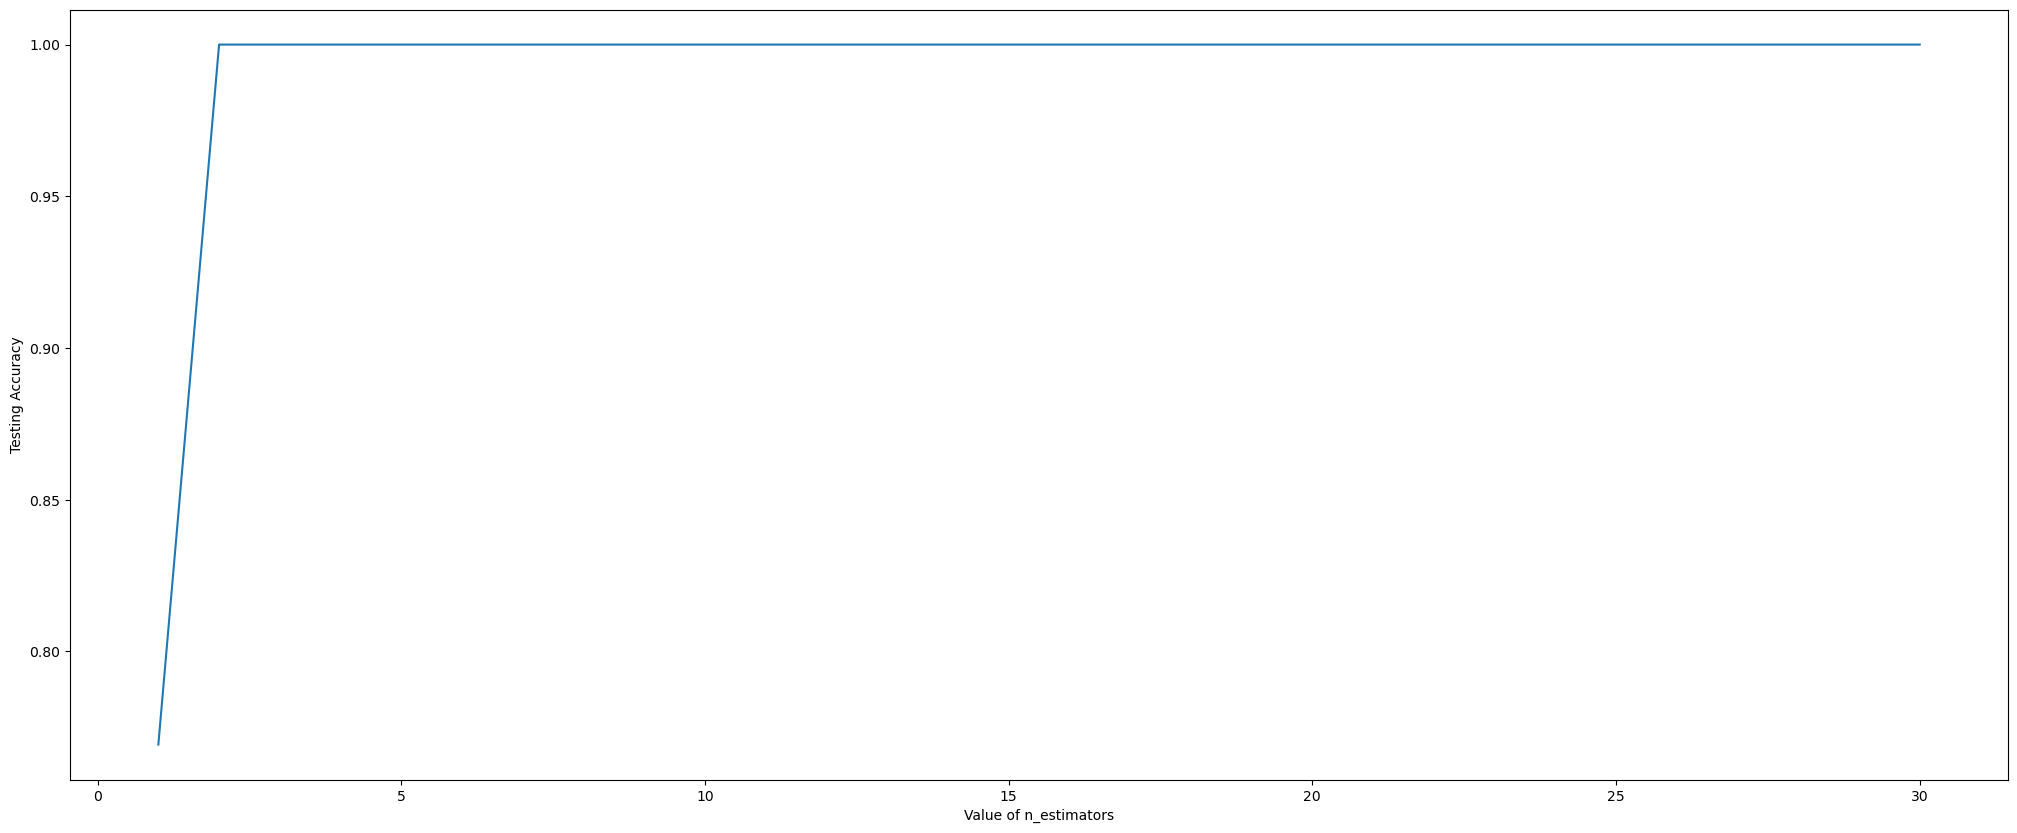

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_best_estimator,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)

[[3 0 0]
 [0 6 0]
 [0 0 4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

Accurecy:  1.0


#Graddient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

gradBoost_default = GradientBoostingClassifier(random_state=0)
gradBoost_default.fit(X_train, y_train)
y_pred = gradBoost_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_default,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[3 0 0]
 [0 6 0]
 [0 0 4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

Accurecy:  1.0


1/30 round completed......................... Accurecy: 0.7692307692307693
2/30 round completed......................... Accurecy: 0.7692307692307693
3/30 round completed......................... Accurecy: 0.7692307692307693
4/30 round completed......................... Accurecy: 1.0
5/30 round completed......................... Accurecy: 1.0
6/30 round completed......................... Accurecy: 1.0
7/30 round completed......................... Accurecy: 1.0
8/30 round completed......................... Accurecy: 1.0
9/30 round completed......................... Accurecy: 1.0
10/30 round completed......................... Accurecy: 1.0
11/30 round completed......................... Accurecy: 1.0
12/30 round completed......................... Accurecy: 1.0
13/30 round completed......................... Accurecy: 1.0
14/30 round completed......................... Accurecy: 1.0
15/30 round completed......................... Accurecy: 1.0
16/30 round completed......................... Ac

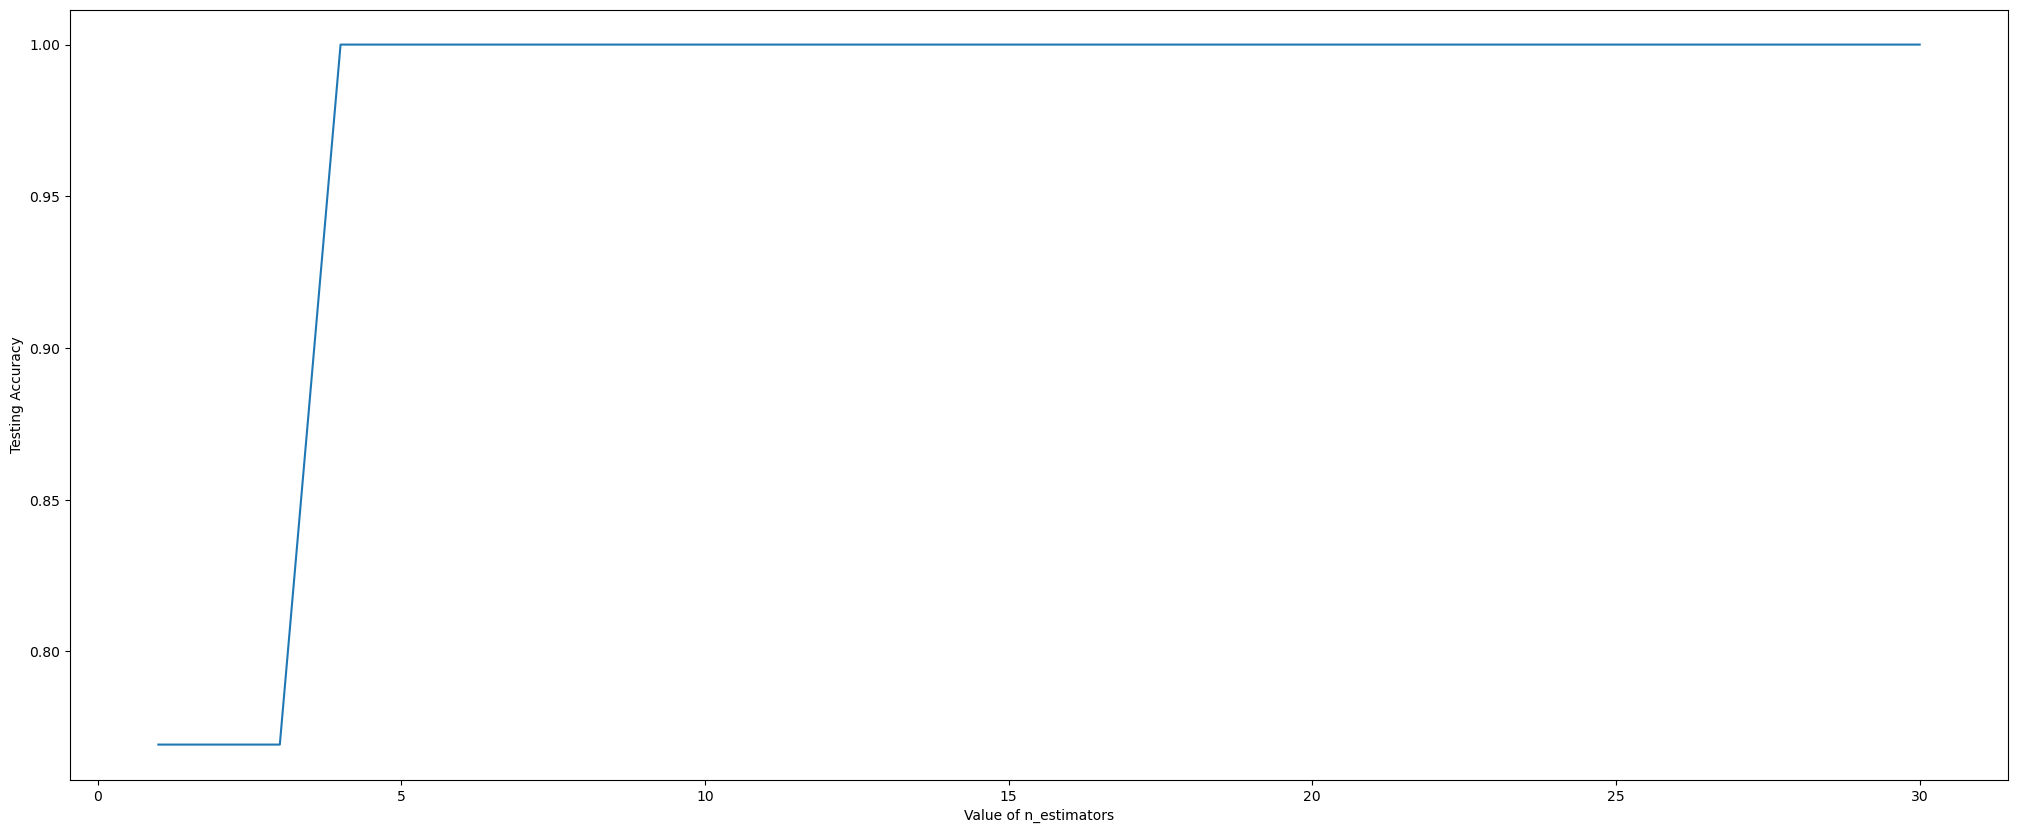

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 1.0
2/30 round completed......................... Accurecy: 1.0
3/30 round completed......................... Accurecy: 1.0
4/30 round completed......................... Accurecy: 1.0
5/30 round completed......................... Accurecy: 1.0
6/30 round completed......................... Accurecy: 1.0
7/30 round completed......................... Accurecy: 1.0
8/30 round completed......................... Accurecy: 1.0
9/30 round completed......................... Accurecy: 1.0
10/30 round completed......................... Accurecy: 1.0
11/30 round completed......................... Accurecy: 1.0
12/30 round completed......................... Accurecy: 1.0
13/30 round completed......................... Accurecy: 1.0
14/30 round completed......................... Accurecy: 1.0
15/30 round completed......................... Accurecy: 1.0
16/30 round completed......................... Accurecy: 1.0
17/30 round completed............

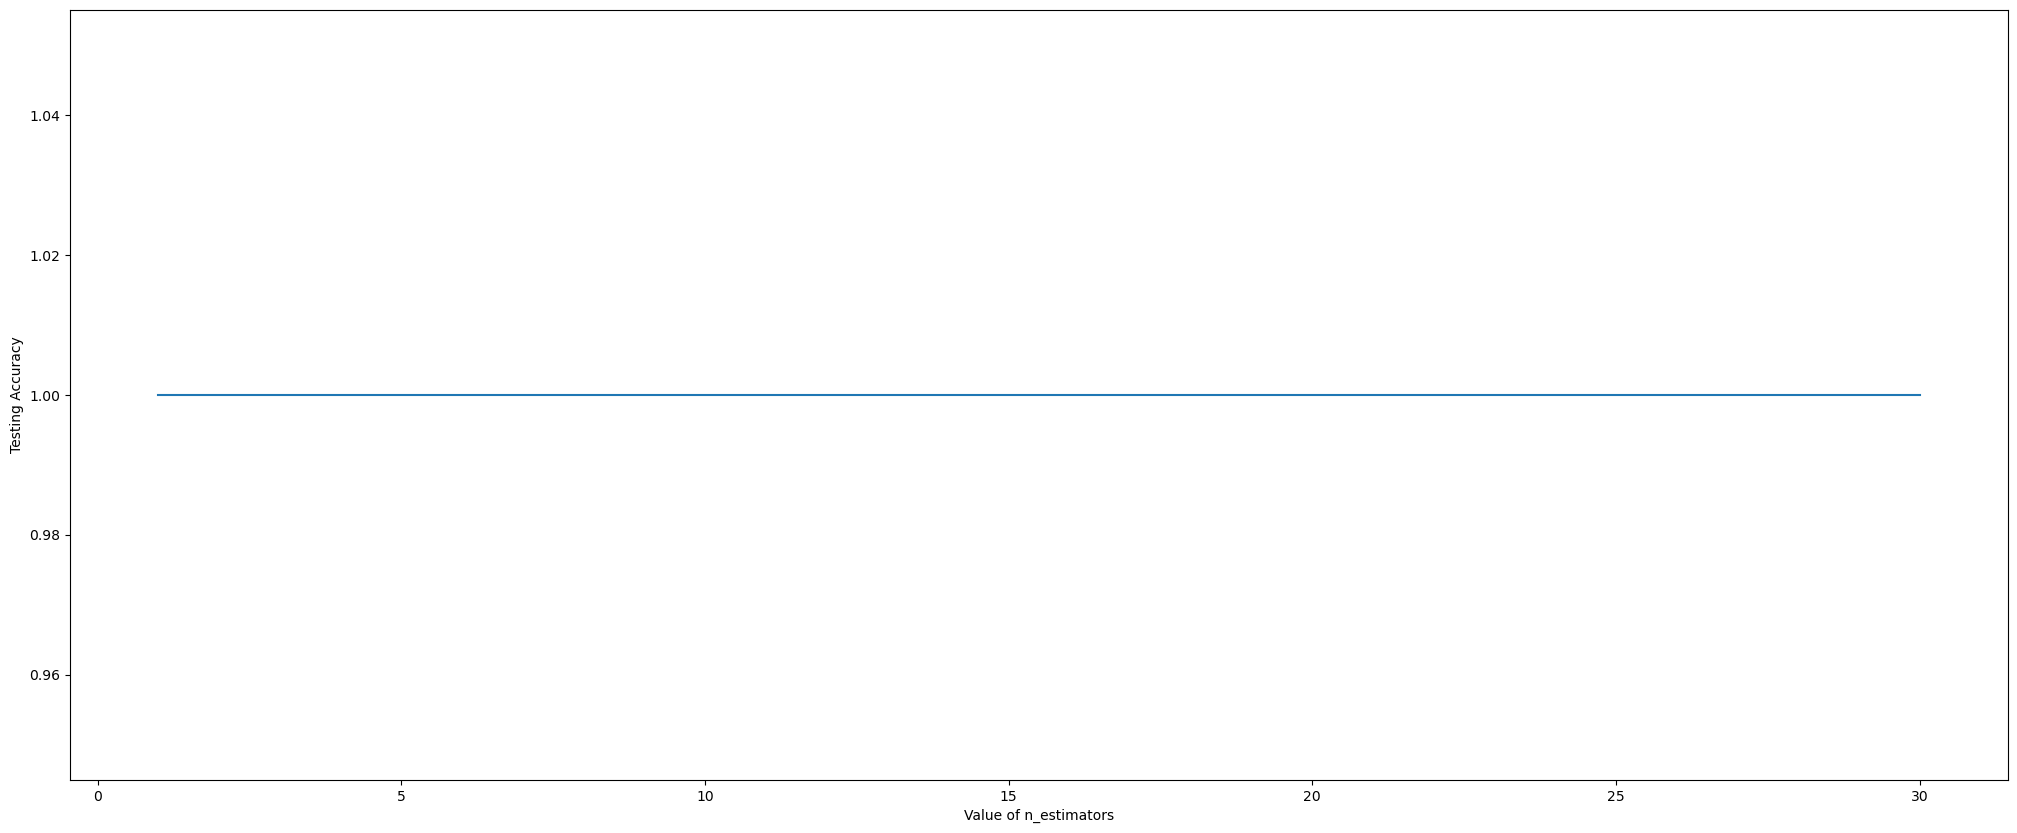

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_estimator,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[3 0 0]
 [0 6 0]
 [0 0 4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

Accurecy:  1.0


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_depth,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[3 0 0]
 [0 6 0]
 [0 0 4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

Accurecy:  1.0


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_all,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[0 3 0]
 [0 6 0]
 [0 0 4]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.67      1.00      0.80         6
           2       1.00      1.00      1.00         4

    accuracy                           0.77        13
   macro avg       0.56      0.67      0.60        13
weighted avg       0.62      0.77      0.68        13

Accurecy:  0.7692307692307693


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state=0)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_default,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[0 3 0]
 [0 6 0]
 [0 0 4]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.67      1.00      0.80         6
           2       1.00      1.00      1.00         4

    accuracy                           0.77        13
   macro avg       0.56      0.67      0.60        13
weighted avg       0.62      0.77      0.68        13

Accurecy:  0.7692307692307693


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


1/30 round completed......................... Accurecy: 0.3076923076923077
2/30 round completed......................... Accurecy: 0.46153846153846156
3/30 round completed......................... Accurecy: 0.7692307692307693
4/30 round completed......................... Accurecy: 0.6153846153846154
5/30 round completed......................... Accurecy: 0.7692307692307693
6/30 round completed......................... Accurecy: 0.7692307692307693
7/30 round completed......................... Accurecy: 0.7692307692307693
8/30 round completed......................... Accurecy: 0.7692307692307693
9/30 round completed......................... Accurecy: 0.7692307692307693
10/30 round completed......................... Accurecy: 0.7692307692307693
11/30 round completed......................... Accurecy: 0.7692307692307693
12/30 round completed......................... Accurecy: 0.7692307692307693
13/30 round completed......................... Accurecy: 0.7692307692307693
14/30 round complete

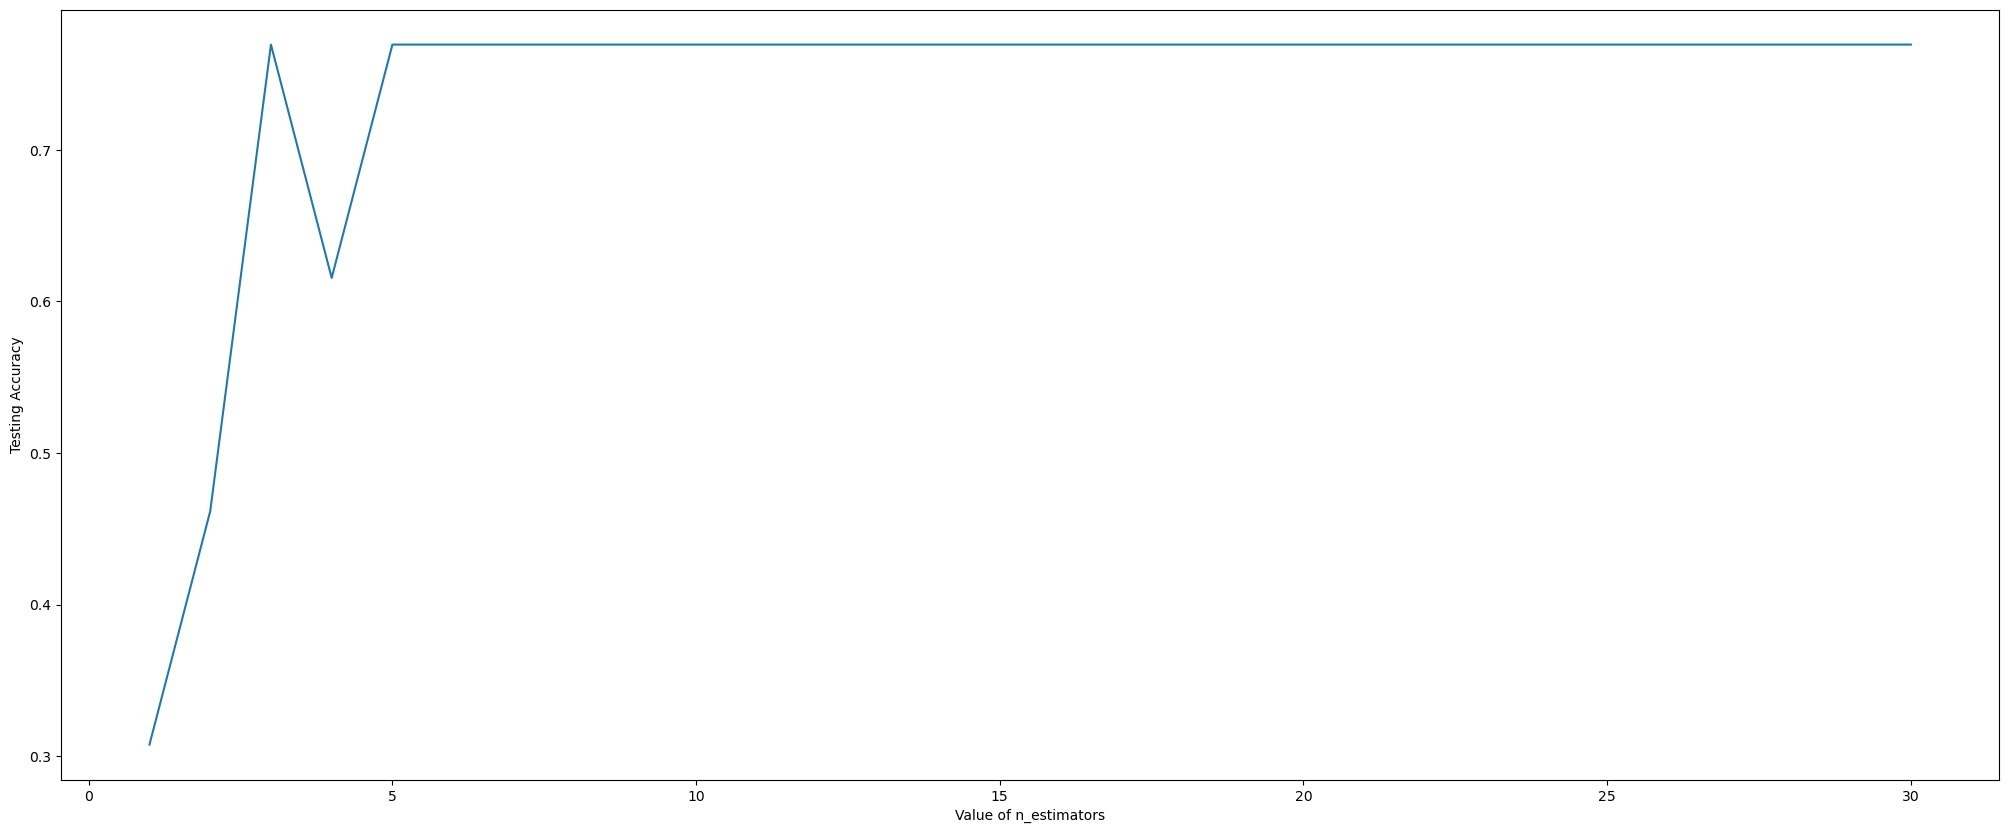

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.7692307692307693
2/30 round completed......................... Accurecy: 0.7692307692307693
3/30 round completed......................... Accurecy: 0.7692307692307693
4/30 round completed......................... Accurecy: 0.7692307692307693
5/30 round completed......................... Accurecy: 0.7692307692307693
6/30 round completed......................... Accurecy: 0.7692307692307693
7/30 round completed......................... Accurecy: 0.7692307692307693
8/30 round completed......................... Accurecy: 0.7692307692307693
9/30 round completed......................... Accurecy: 0.7692307692307693
10/30 round completed......................... Accurecy: 0.7692307692307693
11/30 round completed......................... Accurecy: 0.7692307692307693
12/30 round completed......................... Accurecy: 0.7692307692307693
13/30 round completed......................... Accurecy: 0.7692307692307693
14/30 round completed

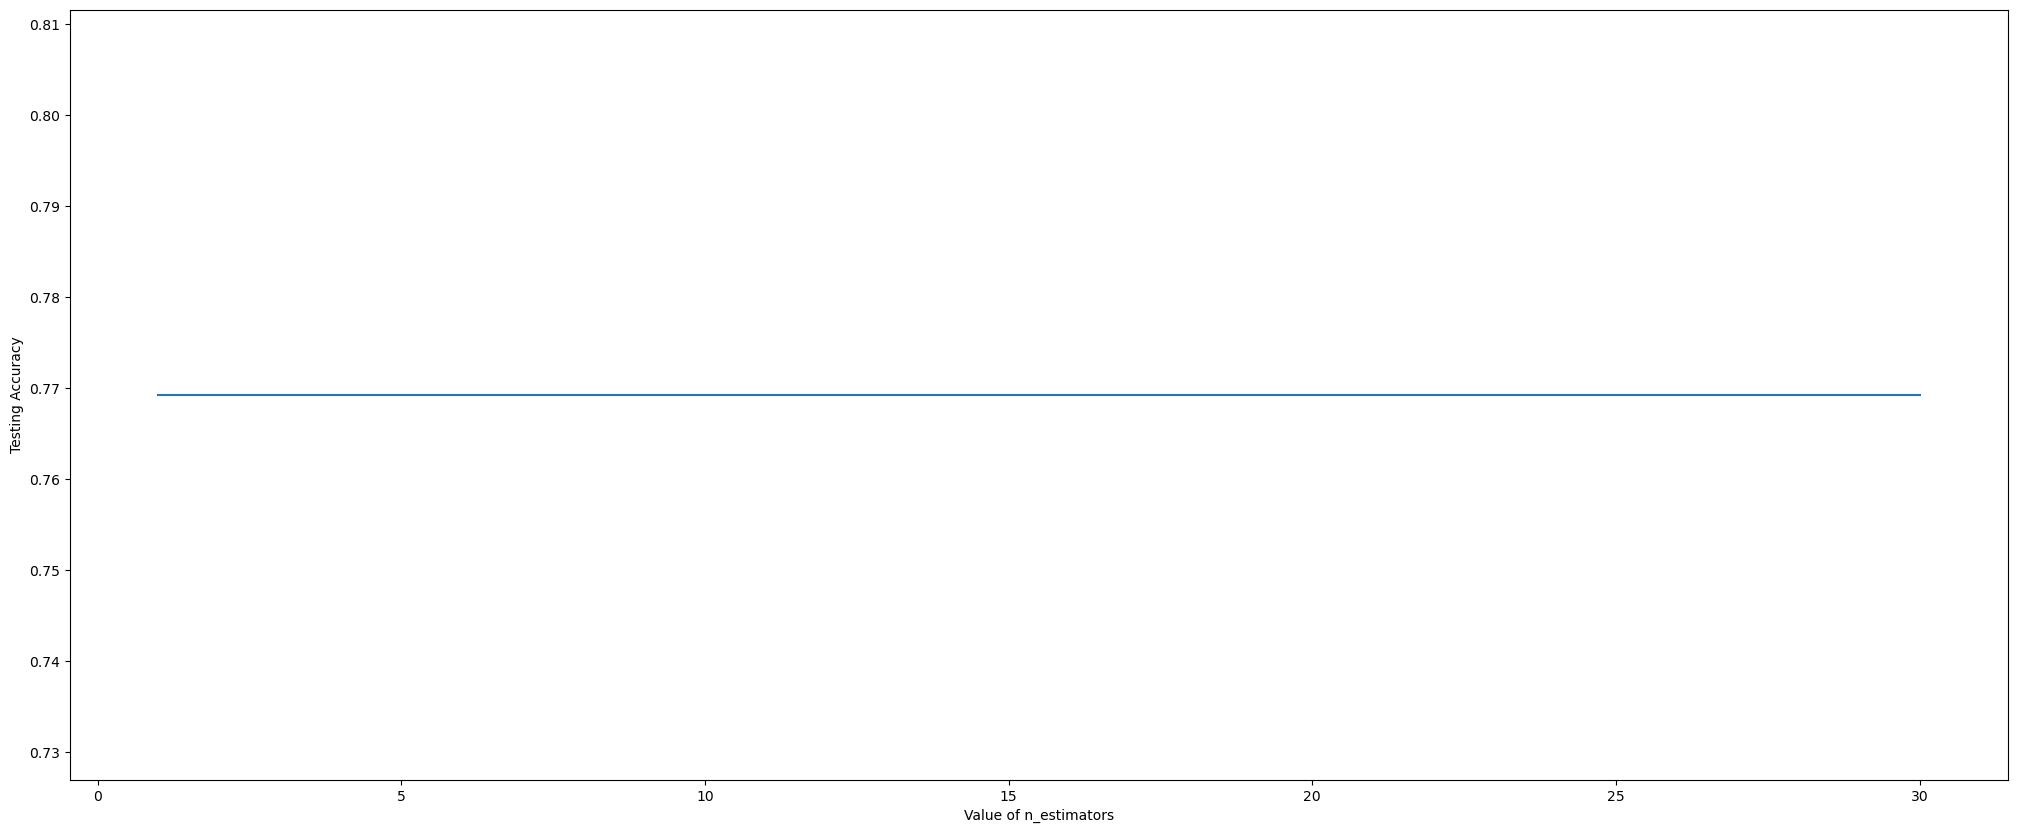

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_estimator,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[0 3 0]
 [0 6 0]
 [0 0 4]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.67      1.00      0.80         6
           2       1.00      1.00      1.00         4

    accuracy                           0.77        13
   macro avg       0.56      0.67      0.60        13
weighted avg       0.62      0.77      0.68        13

Accurecy:  0.7692307692307693


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_depth,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[0 3 0]
 [0 6 0]
 [0 0 4]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.67      1.00      0.80         6
           2       1.00      1.00      1.00         4

    accuracy                           0.77        13
   macro avg       0.56      0.67      0.60        13
weighted avg       0.62      0.77      0.68        13

Accurecy:  0.7692307692307693


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_all,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[0 3 0]
 [0 6 0]
 [0 0 4]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.67      1.00      0.80         6
           2       1.00      1.00      1.00         4

    accuracy                           0.77        13
   macro avg       0.56      0.67      0.60        13
weighted avg       0.62      0.77      0.68        13

Accurecy:  0.7692307692307693


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


#XGB

In [ ]:
# @title


In [ ]:
# @title


import xgboost as xgb
xgb_deafult = xgb.XGBClassifier(random_state=0)
xgb_deafult.fit(X_train,y_train)
y_pred = xgb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_deafult,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[1 2 0]
 [1 5 0]
 [0 0 4]]
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.71      0.83      0.77         6
           2       1.00      1.00      1.00         4

    accuracy                           0.77        13
   macro avg       0.74      0.72      0.72        13
weighted avg       0.75      0.77      0.76        13

Accurecy:  0.7692307692307693


1/30 round completed......................... Accurecy: 0.5384615384615384
2/30 round completed......................... Accurecy: 0.5384615384615384
3/30 round completed......................... Accurecy: 0.5384615384615384
4/30 round completed......................... Accurecy: 0.5384615384615384
5/30 round completed......................... Accurecy: 0.5384615384615384
6/30 round completed......................... Accurecy: 0.6923076923076923
7/30 round completed......................... Accurecy: 0.6923076923076923
8/30 round completed......................... Accurecy: 0.6923076923076923
9/30 round completed......................... Accurecy: 0.6923076923076923
10/30 round completed......................... Accurecy: 0.6923076923076923
11/30 round completed......................... Accurecy: 0.6923076923076923
12/30 round completed......................... Accurecy: 0.7692307692307693
13/30 round completed......................... Accurecy: 0.7692307692307693
14/30 round completed

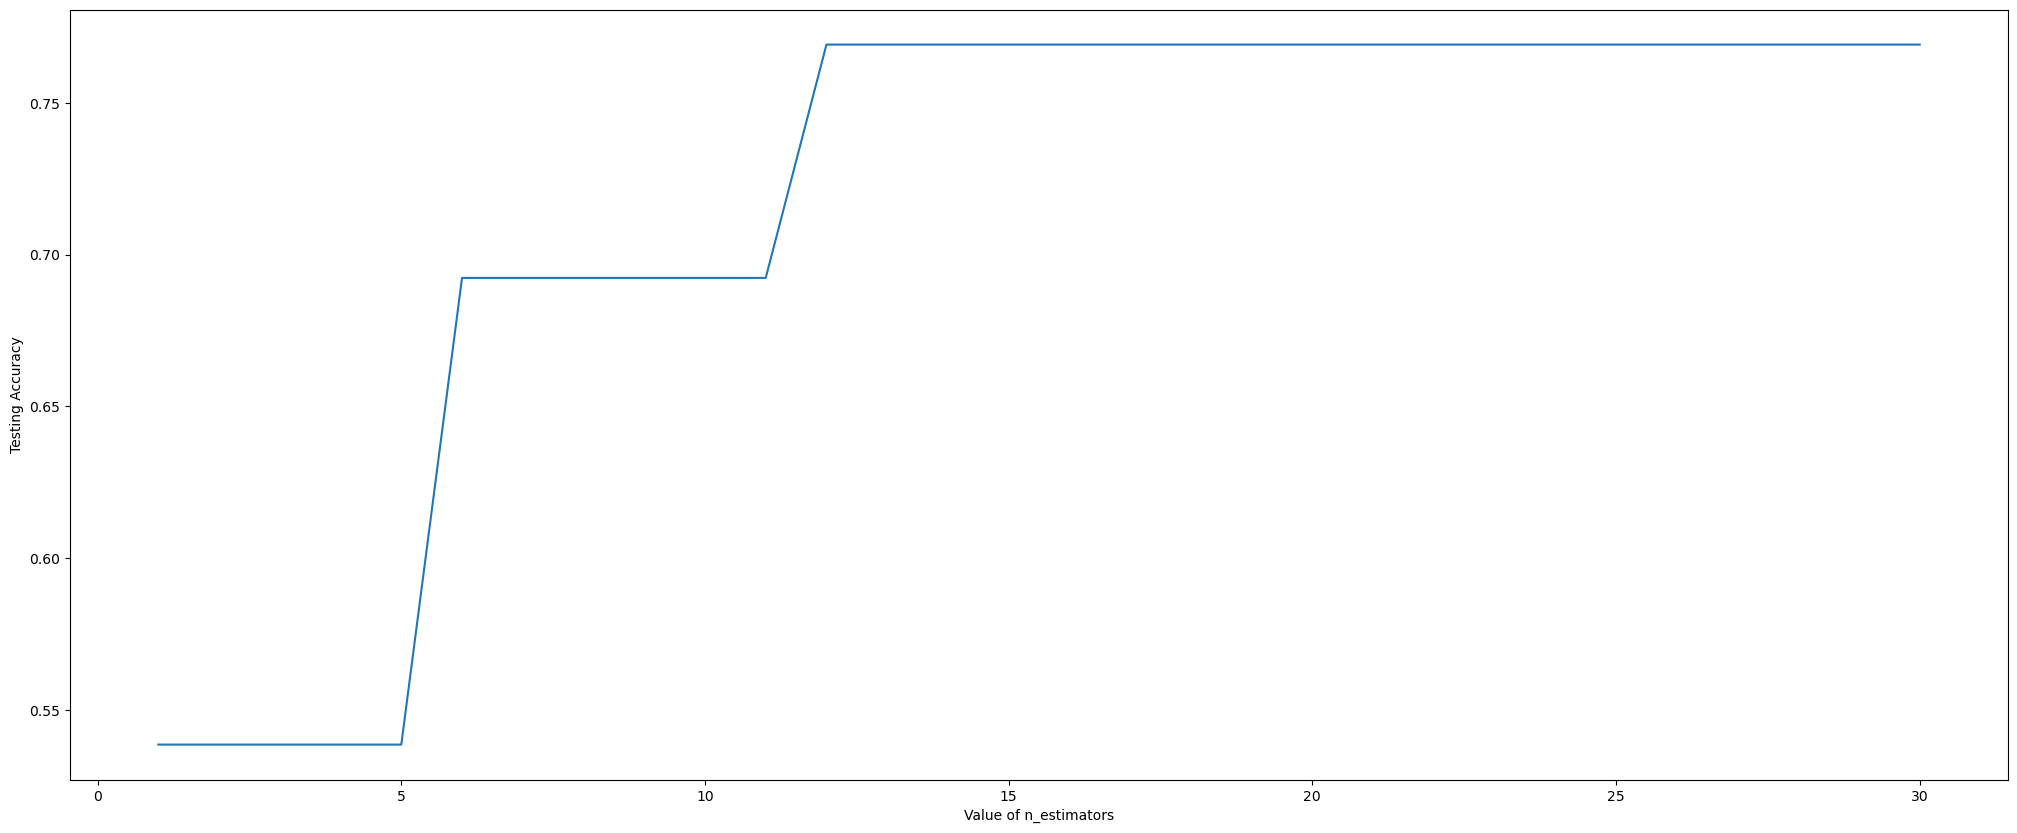

In [ ]:
# @title
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.7692307692307693
2/30 round completed......................... Accurecy: 0.7692307692307693
3/30 round completed......................... Accurecy: 0.7692307692307693
4/30 round completed......................... Accurecy: 0.7692307692307693
5/30 round completed......................... Accurecy: 0.7692307692307693
6/30 round completed......................... Accurecy: 0.7692307692307693
7/30 round completed......................... Accurecy: 0.7692307692307693
8/30 round completed......................... Accurecy: 0.7692307692307693
9/30 round completed......................... Accurecy: 0.7692307692307693
10/30 round completed......................... Accurecy: 0.7692307692307693
11/30 round completed......................... Accurecy: 0.7692307692307693
12/30 round completed......................... Accurecy: 0.7692307692307693
13/30 round completed......................... Accurecy: 0.7692307692307693
14/30 round completed

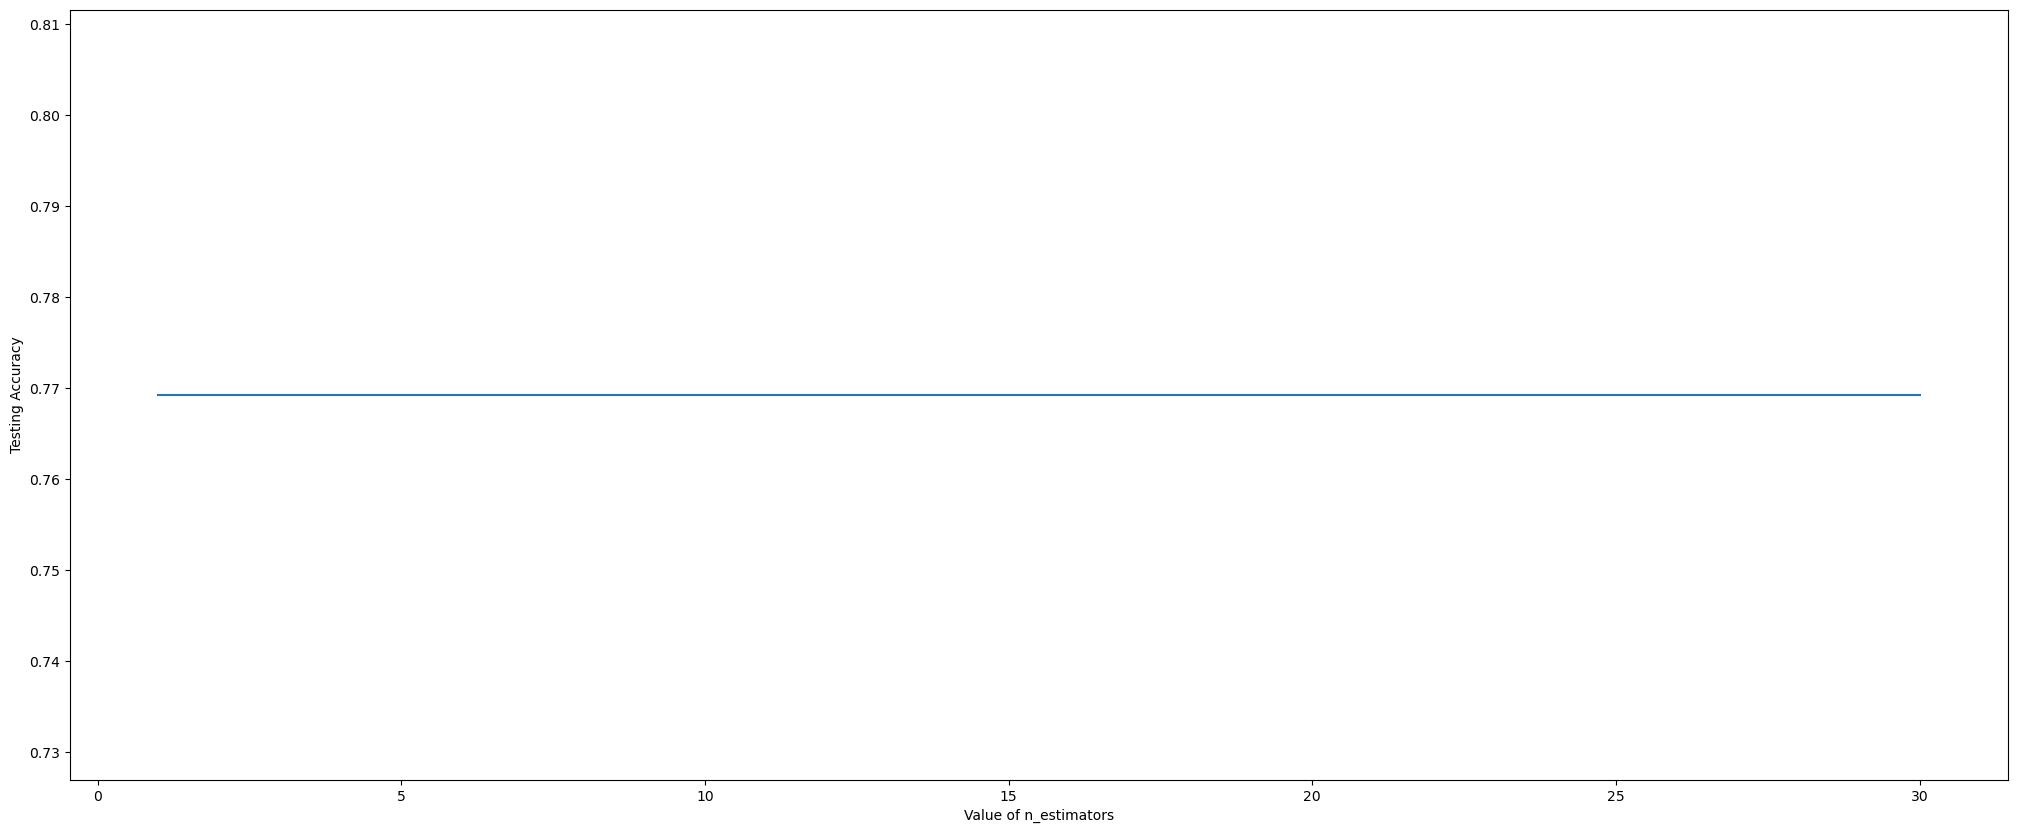

In [ ]:
# @title
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
# @title
import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train,y_train)
y_pred = xgb_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_depth,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_depth)

[[1 2 0]
 [1 5 0]
 [0 0 4]]
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.71      0.83      0.77         6
           2       1.00      1.00      1.00         4

    accuracy                           0.77        13
   macro avg       0.74      0.72      0.72        13
weighted avg       0.75      0.77      0.76        13

Accurecy:  0.7692307692307693
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
            

In [ ]:
# @title
import xgboost as xgb
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train,y_train)
y_pred = xgb_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_estimator,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_estimator)

[[1 2 0]
 [1 5 0]
 [0 0 4]]
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.71      0.83      0.77         6
           2       1.00      1.00      1.00         4

    accuracy                           0.77        13
   macro avg       0.74      0.72      0.72        13
weighted avg       0.75      0.77      0.76        13

Accurecy:  0.7692307692307693
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
         

In [ ]:
# @title
import xgboost as xgb
xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train,y_train)
y_pred = xgb_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_all,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[0 3 0]
 [0 6 0]
 [0 0 4]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.67      1.00      0.80         6
           2       1.00      1.00      1.00         4

    accuracy                           0.77        13
   macro avg       0.56      0.67      0.60        13
weighted avg       0.62      0.77      0.68        13

Accurecy:  0.7692307692307693


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred=knn_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_default,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[1 1 1]
 [0 6 0]
 [0 2 2]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.67      1.00      0.80         6
           2       0.67      0.50      0.57         4

    accuracy                           0.69        13
   macro avg       0.78      0.61      0.62        13
weighted avg       0.74      0.69      0.66        13

Accurecy:  0.6923076923076923


1/30 round completed......................... Accurecy: 0.46153846153846156
2/30 round completed......................... Accurecy: 0.6153846153846154
3/30 round completed......................... Accurecy: 0.5384615384615384
4/30 round completed......................... Accurecy: 0.6153846153846154
5/30 round completed......................... Accurecy: 0.6923076923076923
6/30 round completed......................... Accurecy: 0.5384615384615384
7/30 round completed......................... Accurecy: 0.6153846153846154
8/30 round completed......................... Accurecy: 0.5384615384615384
9/30 round completed......................... Accurecy: 0.5384615384615384
10/30 round completed......................... Accurecy: 0.5384615384615384
11/30 round completed......................... Accurecy: 0.6923076923076923
12/30 round completed......................... Accurecy: 0.6153846153846154
13/30 round completed......................... Accurecy: 0.6153846153846154
14/30 round complete

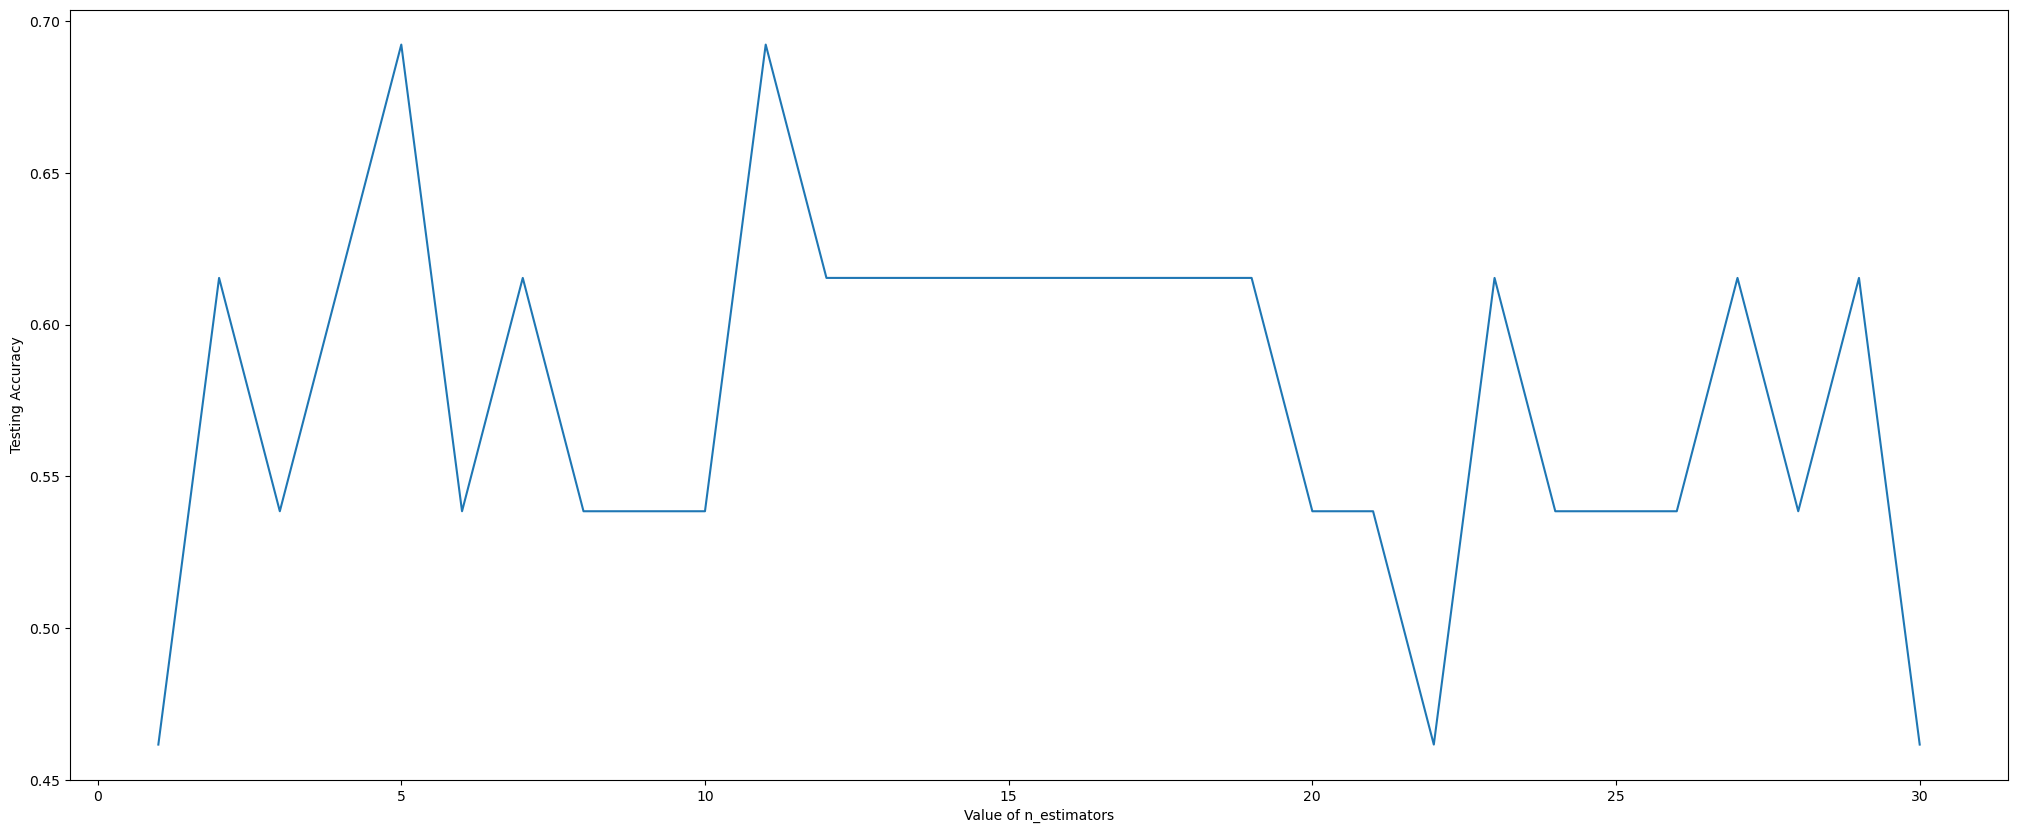

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=30
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_neighbors = KNeighborsClassifier(n_neighbors=best)
knn_neighbors.fit(X_train, y_train)
y_pred=knn_neighbors.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_neighbors,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[1 1 1]
 [0 6 0]
 [0 2 2]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.67      1.00      0.80         6
           2       0.67      0.50      0.57         4

    accuracy                           0.69        13
   macro avg       0.78      0.61      0.62        13
weighted avg       0.74      0.69      0.66        13

Accurecy:  0.6923076923076923


#NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_deafult = GaussianNB()
nb_deafult.fit(X_train, y_train)
y_pred = nb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(nb_deafult,6,'GaussianNB')]=accuracy_score(y_test, y_pred)

[[3 0 0]
 [0 6 0]
 [0 0 4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

Accurecy:  1.0


#Result

In [ ]:

models=[]

for i in result:
  models.append(i[0])
  print(i[0],i[1]," : ",result[i])
  print("---------------------------------------------------------------")
  print()


AdaBoostClassifier(random_state=0) 1  :  1.0
---------------------------------------------------------------

AdaBoostClassifier(n_estimators=2, random_state=0) 1  :  1.0
---------------------------------------------------------------

GradientBoostingClassifier(random_state=0) 2  :  1.0
---------------------------------------------------------------

GradientBoostingClassifier(n_estimators=4, random_state=0) 2  :  1.0
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=1, random_state=0) 2  :  1.0
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=1, n_estimators=4, random_state=0) 2  :  0.7692307692307693
---------------------------------------------------------------

RandomForestClassifier(random_state=0) 3  :  0.7692307692307693
---------------------------------------------------------------

RandomForestClassifier(n_estimators=3, random_state=0) 3  :  0.7692307692307693
----------

In [ ]:
sorted_list=[]
sorted_list = sorted(result, key=result.get,reverse=True)

for i in sorted_list:
  print(i,"  : ",result[i])
  print("-------------------------------------------------------------------------------------------------")

print(sorted_list)


flage=[]
best_models=[]
it=0

for i in sorted_list:
  if it==4:
    break

  if i[1] not in flage:
    best_models.append((i[0],i[2]))
    flage.append(i[1])
    it+=1


(AdaBoostClassifier(random_state=0), 1, 'AdaBoostClassifier')   :  1.0
-------------------------------------------------------------------------------------------------
(AdaBoostClassifier(n_estimators=2, random_state=0), 1, 'AdaBoostClassifier')   :  1.0
-------------------------------------------------------------------------------------------------
(GradientBoostingClassifier(random_state=0), 2, 'GradientBoostingClassifier')   :  1.0
-------------------------------------------------------------------------------------------------
(GradientBoostingClassifier(n_estimators=4, random_state=0), 2, 'GradientBoostingClassifier')   :  1.0
-------------------------------------------------------------------------------------------------
(GradientBoostingClassifier(max_depth=1, random_state=0), 2, 'GradientBoostingClassifier')   :  1.0
-------------------------------------------------------------------------------------------------
(GaussianNB(), 6, 'GaussianNB')   :  1.0
---------------------

In [ ]:
print("best_models:")
for i in best_models:
  print(i)


best_models:
(AdaBoostClassifier(random_state=0), 'AdaBoostClassifier')
(GradientBoostingClassifier(random_state=0), 'GradientBoostingClassifier')
(GaussianNB(), 'GaussianNB')
(RandomForestClassifier(random_state=0), 'RandomForestClassifier')


#Testing Accuracy For Best 4 Models

In [ ]:

for i in best_models:
  print("--------------------------------------------------")
  print(i[0])
  y_pred=i[0].predict(X_train)
  print(confusion_matrix(y_train, y_pred))
  print(classification_report(y_train,y_pred))
  print("Accurecy: ",accuracy_score(y_train, y_pred))

--------------------------------------------------
AdaBoostClassifier(random_state=0)
[[ 2  0  0]
 [ 0 19  0]
 [ 0  0 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        16

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37

Accurecy:  1.0
--------------------------------------------------
GradientBoostingClassifier(random_state=0)
[[ 2  0  0]
 [ 0 19  0]
 [ 0  0 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        16

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00 

#Confusion Matrix For Testing

In [ ]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)
  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)



def models_check_box(models):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
new_keys_6=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=2, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=4, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=1, n_estimators=4, random_state=0)', i…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=3, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=1, n_estimators=3, random_state=0)', inden…

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [ ]:

from yellowbrick.classifier import ConfusionMatrix


for i in range(len(new_keys_6)):
  if new_keys_6[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=classes)

    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()

#Confusion Matrix For Training

In [ ]:
new_keys_5=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=2, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=4, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=1, n_estimators=4, random_state=0)', i…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=3, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=1, n_estimators=3, random_state=0)', inden…

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [ ]:

for i in range(len(new_keys_5)):
  if new_keys_5[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=classes)

    cm.fit(X_train, y_train)
    cm.score(X_train, y_train)
    cm.show()
    print("-------------------------------")
    print("-------------------------------")

#Result CSV<br>
Predicted and Actual Row will be added at the end index

In [ ]:
def reverse_transfrom(my_list):
  for i in range(len(my_list)):
    if my_list[i] == 0:
      my_list[i] = 'Control'
    else:
      my_list[i] = 'Patient'
  return my_list

In [ ]:
new_keys_4=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=2, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=4, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=1, n_estimators=4, random_state=0)', i…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=3, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=1, n_estimators=3, random_state=0)', inden…

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [ ]:
for i in range(len(new_keys_4)):
  if new_keys_4[i].value ==True:
    temp=X_test_with_subject

    prediction_cls = reverse_transfrom(list(models[i].predict(X_test[0:])))
    actual_cls = reverse_transfrom(list(y_test[0:]))

    temp["Actual"] = actual_cls
    temp["Predicted"] = prediction_cls

    temp.to_csv(str(models[i])+".csv")

# **LIME**

In [ ]:
!pip install lime

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/275.7 kB ? eta -:--:--
     --------------------------------       235.5/275.7 kB 7.3 MB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283846 sha256=2204d30af6fa413ab4febca5532ccca41be71eb57a293dc97ceb272e8f9692c6
  Stored in directory: c:\users\richard\appdata\local\pip\cache\wheels\85\fa\a3\9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:

  def LIME_EXP(model,row):
    import lime
    from lime import lime_tabular


    if str(model)[:3] == "XGB":

      """explainer = lime.lime_tabular.LimeTabularExplainer(
        X_train.values,
        feature_names=list(list(X_new.columns)),
        class_names=['Reading', 'Resting', 'Walking', 'Working']
        )

      exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 model.predict_proba,
                                 num_features=6,
                                 top_labels=2)"""
      print("Plz RUN XGboost cell....")
      return None



    else:
      explainer = lime_tabular.LimeTabularExplainer(
        training_data=np.array(X_train),
        feature_names=list(X_new.columns),
        class_names=['Reading', 'Resting', 'Walking', 'Working'],
        mode='classification'
        )

      exp = explainer.explain_instance(X_test.iloc[row],
                                      model.predict_proba,
                                      num_features=6,
                                      top_labels=4)



    exp.show_in_notebook(show_table=True, show_all=True)



    import matplotlib.pyplot as plt
    with plt.style.context("ggplot"):
        exp.as_pyplot_figure()


    from IPython.display import HTML
    html_data = exp.as_html()
    HTML(data=html_data)

    exp.save_to_file(str(model)+".html")

In [ ]:
row = int(input("Enter the index of row to explain: "))      # the index of row to be explained in LIME


new_keys_8=models_check_box(models)

Enter the index of row to explain:  25


Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=2, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=4, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=1, n_estimators=4, random_state=0)', i…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=3, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=1, n_estimators=3, random_state=0)', inden…

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [ ]:
for i in range(len(new_keys_8)):
  if new_keys_8[i].value ==True:
    print(models[i])
    LIME_EXP(models[i],row)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

### LIME for XGboost

In [ ]:
X_new = X
y_new = y

In [ ]:
row = 18  ## the index of row to be explained in LIME

import lime
from lime import lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=list(list(X_new.columns)),
                                                   class_names=['Poor', 'Normal'])

####Default

In [ ]:
'''
exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_deafult.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_deafult)+".html")
'''

'\nexp = explainer.explain_instance(X_test.iloc[row, :].values,\n                                 xgb_deafult.predict_proba,\n                                 num_features=6,\n                                 top_labels=4)\n\nexp.show_in_notebook(show_table=True, show_all=False)\n\nimport matplotlib.pyplot as plt\nwith plt.style.context("ggplot"):\n    exp.as_pyplot_figure()\n\n\nfrom IPython.display import HTML\nhtml_data = exp.as_html()\nHTML(data=html_data)\n\nexp.save_to_file(str(xgb_deafult)+".html")\n'

####Best Max Depth

In [ ]:
'''
exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_depth.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_depth)+".html")
'''

'\nexp = explainer.explain_instance(X_test.iloc[row, :].values,\n                                 xgb_depth.predict_proba,\n                                 num_features=6,\n                                 top_labels=4)\n\nexp.show_in_notebook(show_table=True, show_all=False)\n\nimport matplotlib.pyplot as plt\nwith plt.style.context("ggplot"):\n    exp.as_pyplot_figure()\n\n\nfrom IPython.display import HTML\nhtml_data = exp.as_html()\nHTML(data=html_data)\n\nexp.save_to_file(str(xgb_depth)+".html")\n'

####Best N Estimator

In [ ]:
'''

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_estimator.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_estimator)+".html")
'''

'\n\nexp = explainer.explain_instance(X_test.iloc[row, :].values,\n                                 xgb_estimator.predict_proba,\n                                 num_features=6,\n                                 top_labels=4)\n\nexp.show_in_notebook(show_table=True, show_all=False)\n\nimport matplotlib.pyplot as plt\nwith plt.style.context("ggplot"):\n    exp.as_pyplot_figure()\n\n\nfrom IPython.display import HTML\nhtml_data = exp.as_html()\nHTML(data=html_data)\n\nexp.save_to_file(str(xgb_estimator)+".html")\n'

####Best Depth and Best Estimator

In [ ]:
'''
exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_all.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)


import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_all)+".html")
'''

'\nexp = explainer.explain_instance(X_test.iloc[row, :].values,\n                                 xgb_all.predict_proba,\n                                 num_features=6,\n                                 top_labels=4)\n\nexp.show_in_notebook(show_table=True, show_all=False)\n\n\nimport matplotlib.pyplot as plt\nwith plt.style.context("ggplot"):\n    exp.as_pyplot_figure()\n\n\nfrom IPython.display import HTML\nhtml_data = exp.as_html()\nHTML(data=html_data)\n\nexp.save_to_file(str(xgb_all)+".html")\n'

#Cross_val_score function

In [ ]:
X_new = X
y_new = y

In [ ]:
from sklearn.model_selection import cross_val_score

k=10
for i in result:
  print(i[0]," -> Accuracy: ",result[i])
  l=list(cross_val_score(i[0],X_new.iloc[:,1:], y_new,cv=k))
  avg=sum(l)/k
  print(i[0]," -> AVG Accurecy After CV: "+str(avg)+ " (For "+str(k)+" Fold)")
  print("--------------------------------------------------------------------------")

AdaBoostClassifier(random_state=0)  -> Accuracy:  1.0


The least populated class in y has only 5 members, which is less than n_splits=10.


AdaBoostClassifier(random_state=0)  -> AVG Accurecy After CV: 1.0 (For 10 Fold)
--------------------------------------------------------------------------
AdaBoostClassifier(n_estimators=2, random_state=0)  -> Accuracy:  1.0
AdaBoostClassifier(n_estimators=2, random_state=0)  -> AVG Accurecy After CV: 1.0 (For 10 Fold)
--------------------------------------------------------------------------
GradientBoostingClassifier(random_state=0)  -> Accuracy:  1.0


The least populated class in y has only 5 members, which is less than n_splits=10.
The least populated class in y has only 5 members, which is less than n_splits=10.


GradientBoostingClassifier(random_state=0)  -> AVG Accurecy After CV: 1.0 (For 10 Fold)
--------------------------------------------------------------------------
GradientBoostingClassifier(n_estimators=4, random_state=0)  -> Accuracy:  1.0
GradientBoostingClassifier(n_estimators=4, random_state=0)  -> AVG Accurecy After CV: 1.0 (For 10 Fold)
--------------------------------------------------------------------------
GradientBoostingClassifier(max_depth=1, random_state=0)  -> Accuracy:  1.0


The least populated class in y has only 5 members, which is less than n_splits=10.
The least populated class in y has only 5 members, which is less than n_splits=10.


GradientBoostingClassifier(max_depth=1, random_state=0)  -> AVG Accurecy After CV: 1.0 (For 10 Fold)
--------------------------------------------------------------------------
GradientBoostingClassifier(max_depth=1, n_estimators=4, random_state=0)  -> Accuracy:  0.7692307692307693
GradientBoostingClassifier(max_depth=1, n_estimators=4, random_state=0)  -> AVG Accurecy After CV: 0.9 (For 10 Fold)
--------------------------------------------------------------------------
RandomForestClassifier(random_state=0)  -> Accuracy:  0.7692307692307693


The least populated class in y has only 5 members, which is less than n_splits=10.
The least populated class in y has only 5 members, which is less than n_splits=10.


RandomForestClassifier(random_state=0)  -> AVG Accurecy After CV: 0.9199999999999999 (For 10 Fold)
--------------------------------------------------------------------------
RandomForestClassifier(n_estimators=3, random_state=0)  -> Accuracy:  0.7692307692307693
RandomForestClassifier(n_estimators=3, random_state=0)  -> AVG Accurecy After CV: 0.9 (For 10 Fold)
--------------------------------------------------------------------------
RandomForestClassifier(max_depth=1, random_state=0)  -> Accuracy:  0.7692307692307693


The least populated class in y has only 5 members, which is less than n_splits=10.
The least populated class in y has only 5 members, which is less than n_splits=10.


RandomForestClassifier(max_depth=1, random_state=0)  -> AVG Accurecy After CV: 0.86 (For 10 Fold)
--------------------------------------------------------------------------
RandomForestClassifier(max_depth=1, n_estimators=3, random_state=0)  -> Accuracy:  0.7692307692307693
RandomForestClassifier(max_depth=1, n_estimators=3, random_state=0)  -> AVG Accurecy After CV: 0.9 (For 10 Fold)
--------------------------------------------------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, ma

The least populated class in y has only 5 members, which is less than n_splits=10.
The least populated class in y has only 5 members, which is less than n_splits=10.


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)  -> AVG Accurecy After CV: 0.9800000000000001 (For 10 Fold)
--------------------------------------------------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsa

The least populated class in y has only 5 members, which is less than n_splits=10.


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)  -> AVG Accurecy After CV: 1.0 (For 10 Fold)
--------------------------------------------------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,


The least populated class in y has only 5 members, which is less than n_splits=10.


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=12, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)  -> AVG Accurecy After CV: 1.0 (For 10 Fold)
--------------------------------------------------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None

The least populated class in y has only 5 members, which is less than n_splits=10.
The least populated class in y has only 5 members, which is less than n_splits=10.


KNeighborsClassifier()  -> AVG Accurecy After CV: 0.52 (For 10 Fold)
--------------------------------------------------------------------------
KNeighborsClassifier()  -> Accuracy:  0.6923076923076923
KNeighborsClassifier()  -> AVG Accurecy After CV: 0.52 (For 10 Fold)
--------------------------------------------------------------------------
GaussianNB()  -> Accuracy:  1.0
GaussianNB()  -> AVG Accurecy After CV: 0.9800000000000001 (For 10 Fold)
--------------------------------------------------------------------------


The least populated class in y has only 5 members, which is less than n_splits=10.
The least populated class in y has only 5 members, which is less than n_splits=10.


In [ ]:


def CV_ROC(model,folds,graph_feat):
  import matplotlib.pyplot as plt

  from sklearn import svm
  from sklearn.metrics import auc,roc_curve
  from sklearn.metrics import RocCurveDisplay
  from sklearn.model_selection import StratifiedKFold


  cv = StratifiedKFold(n_splits=folds)



  tprs = []
  aucs = []
  mean_fpr = np.linspace(0,1,100)
  i = 1
  for train,test in cv.split(X_new.iloc[:,1:], y_new.values):
      prediction = model.fit(X_new.iloc[:,1:].values[train], y_new.values[train]).predict_proba(X_new.iloc[:,1:].values[test])
      fpr, tpr, t = roc_curve(y_new.values[test], prediction[:, 1])
      tprs.append(np.interp(mean_fpr, fpr, tpr))
      roc_auc = auc(fpr, tpr)
      aucs.append(roc_auc)
      plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
      i= i+1

  plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
  mean_tpr = np.mean(tprs, axis=0)
  mean_auc = auc(mean_fpr, mean_tpr)
  plt.plot(mean_fpr, mean_tpr, color='blue',
          label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

  plt.title('CV-ROC-> '+str(model),fontsize= graph_feat["Title Size"], fontweight=graph_feat["Title Fontweight"])
  plt.xlabel('False Positive Rate',fontweight=graph_feat["X axis Label Fontweight"],fontsize=graph_feat["X axis Label Font Size"])
  plt.ylabel('True Positive Rate',fontweight=graph_feat["Y axis Label Fontweight"],fontsize=graph_feat["Y axis Label Font Size"])
  plt.legend(
           prop = {'size' : graph_feat["legend Font Size"]},
           loc = graph_feat["legend Position"])

  fig = plt.gcf()
  fig.set_size_inches(graph_feat["Fig Width (inches)"], graph_feat["Fig Height (inches)"])
  fig.savefig(graph_feat["Fig Saving Name"], dpi=graph_feat["dpi"])
  plt.show()

In [ ]:
new_keys=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=2, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=4, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=1, n_estimators=4, random_state=0)', i…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=3, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=1, n_estimators=3, random_state=0)', inden…

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

<font color="apple green">Just mark the above cell to select the Multiple Algorithms for ROC CV graph. <font color="sky blue"><b>Then run the cell below after selecting.</b></font> You do not need to run above cell everytime...</font><font color='red'><b>Do not run above cell after selecting</b></font>

In [ ]:
# run this cell after selecting

graph_feat={
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_testing.png",
    "dpi":100

}





k_fold=3

for i in range(len(new_keys)):
  if new_keys[i].value ==True:
    CV_ROC(models[i],3,graph_feat)
    print("-----------------------------------------------------------------")
    print("-----------------------------------------------------------------")

ValueError: multiclass format is not supported

#ROC FOR MULTICLASS

In [ ]:
!pip install plotly==5.11.0
!pip install -U kaleido


import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

def ploty_ROC(model,X,y,fig_name,graph_attributes):

    lebel_dict={
    0: 'High Risk',
    1: 'Intermediate Risk',
    2: 'Low Risk'
    }
    if str(model)[:3] == "XGB":
      y_scores = model.predict_proba(X.values)
    else:
      y_scores = model.predict_proba(X)
    #y_scores = model.predict_proba(X)

    y_onehot = pd.get_dummies(y, columns=model.classes_)

    fig = go.Figure()
    fig.add_shape(
        type='line', line=dict(dash='dash', width=5),
        x0=0, x1=1, y0=0, y1=1
    )

    for i in range(y_scores.shape[1]):
        y_true = y_onehot.iloc[:, i]
        y_score = y_scores[:, i]

        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc_score = roc_auc_score(y_true, y_score)
        name = f"{lebel_dict[y_onehot.columns[i]]} (AUC={auc_score:.2f})"
        fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

    fig.update_layout(
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        yaxis=dict(scaleanchor="x", scaleratio=1),
        xaxis=dict(constrain='domain'),
        width=1000, height=1000,
        font=dict(
            family="Arial Black, monospace",
            size=graph_attributes["Font Size"],
            color=graph_attributes["Font Color"]
        ),
        legend=dict(
            x=0.62,
            y=0.05,
            traceorder="reversed",
            title_font_family="Arial Black",
            font=dict(
                family="Arial Black, monospace",
                size=graph_attributes["Legend Font Size"],
                color=graph_attributes["Legend Font Color"]
            ),
            bgcolor=graph_attributes["Legend bgcolor"],
            bordercolor=graph_attributes["Legend bordercolor"],
            borderwidth=graph_attributes["Legend borderwidth"]
        ),
        #plot_bgcolor="",
    )
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black', tickfont_family="Arial Black")
    fig.update_yaxes(showline=True, linewidth=2, linecolor='black',tickfont_family="Arial Black")

    fig.show()
    fig.write_image(fig_name+".png")

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [ ]:
new_keys_9=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=2, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=4, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=1, n_estimators=4, random_state=0)', i…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=3, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=1, n_estimators=3, random_state=0)', inden…

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

GradientBoostingClassifier(max_depth=1, n_estimators=4, random_state=0)


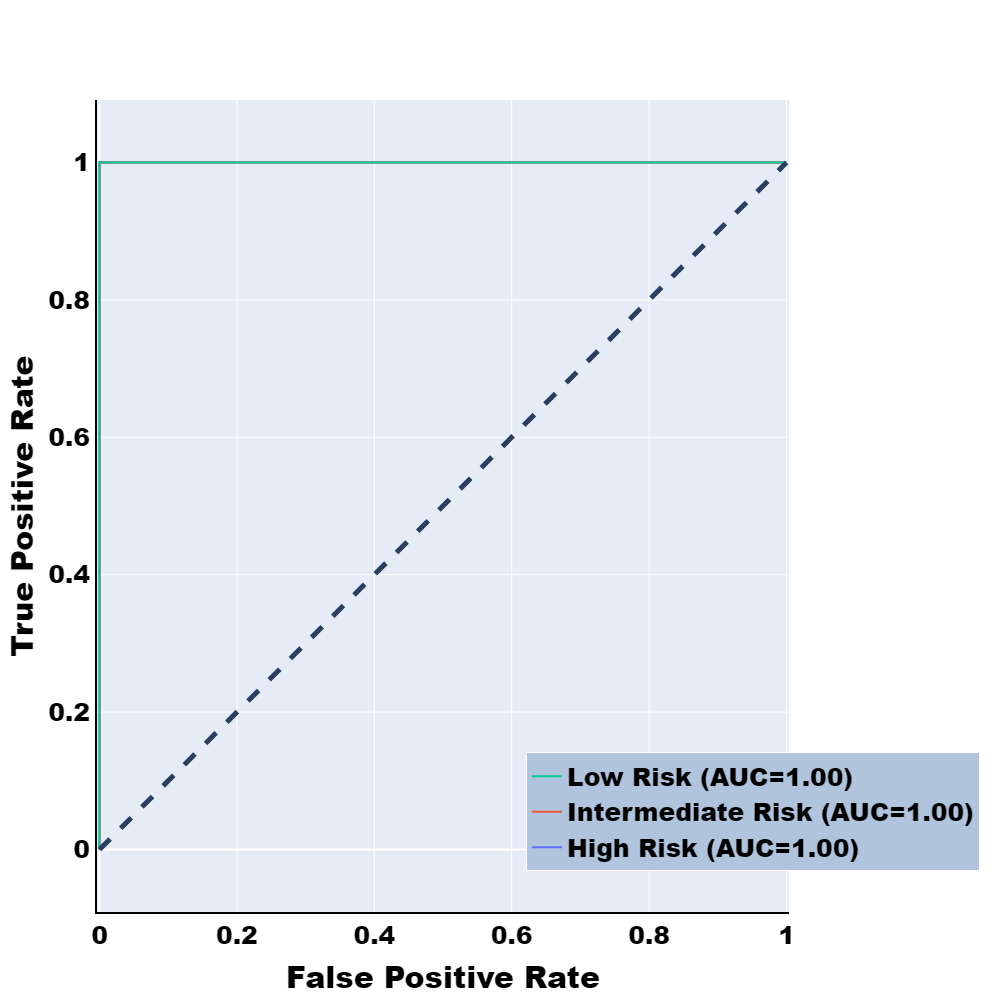

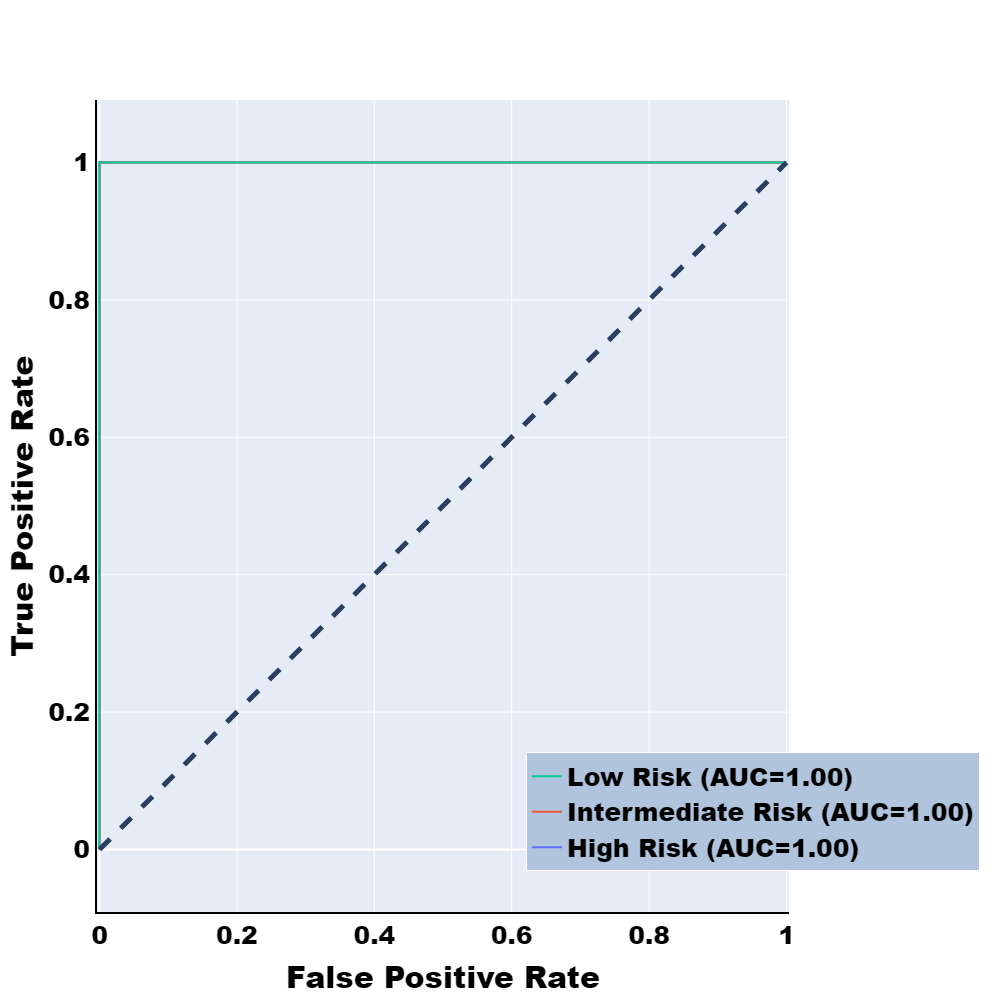

---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------
RandomForestClassifier(max_depth=1, n_estimators=3, random_state=0)


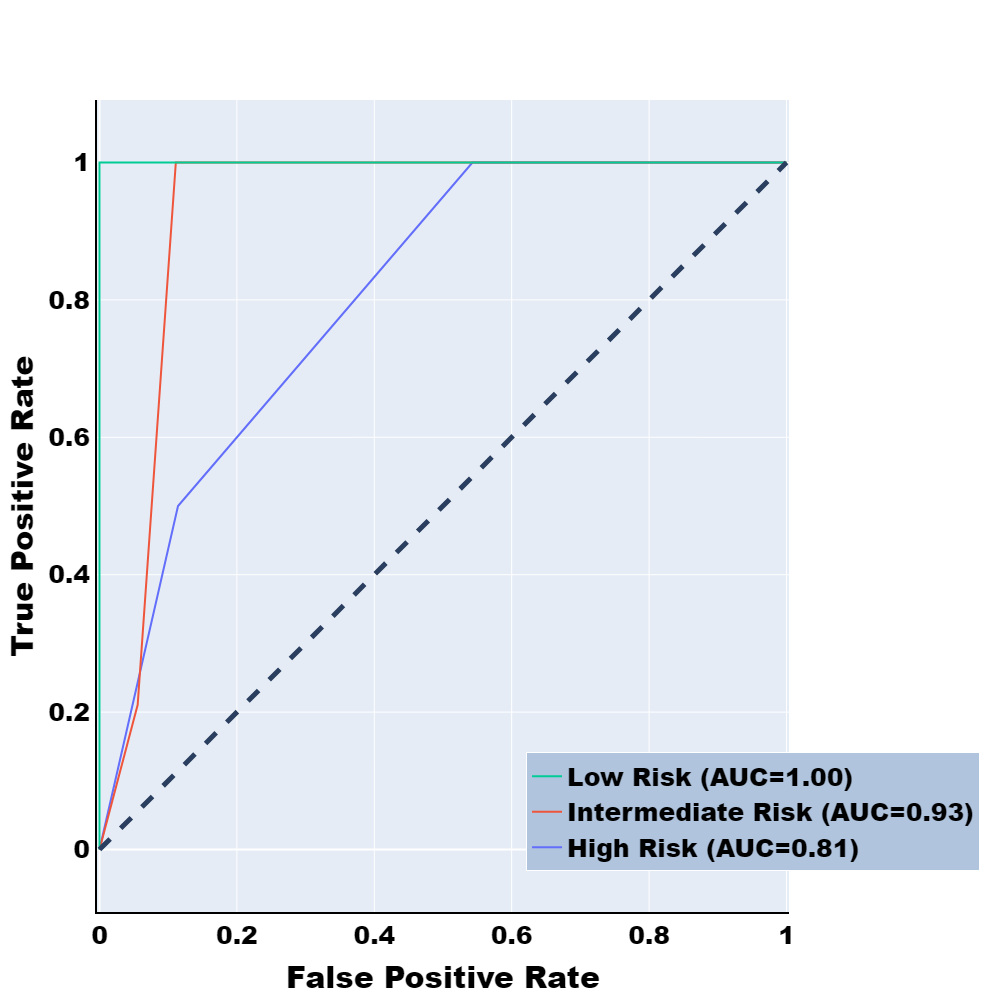

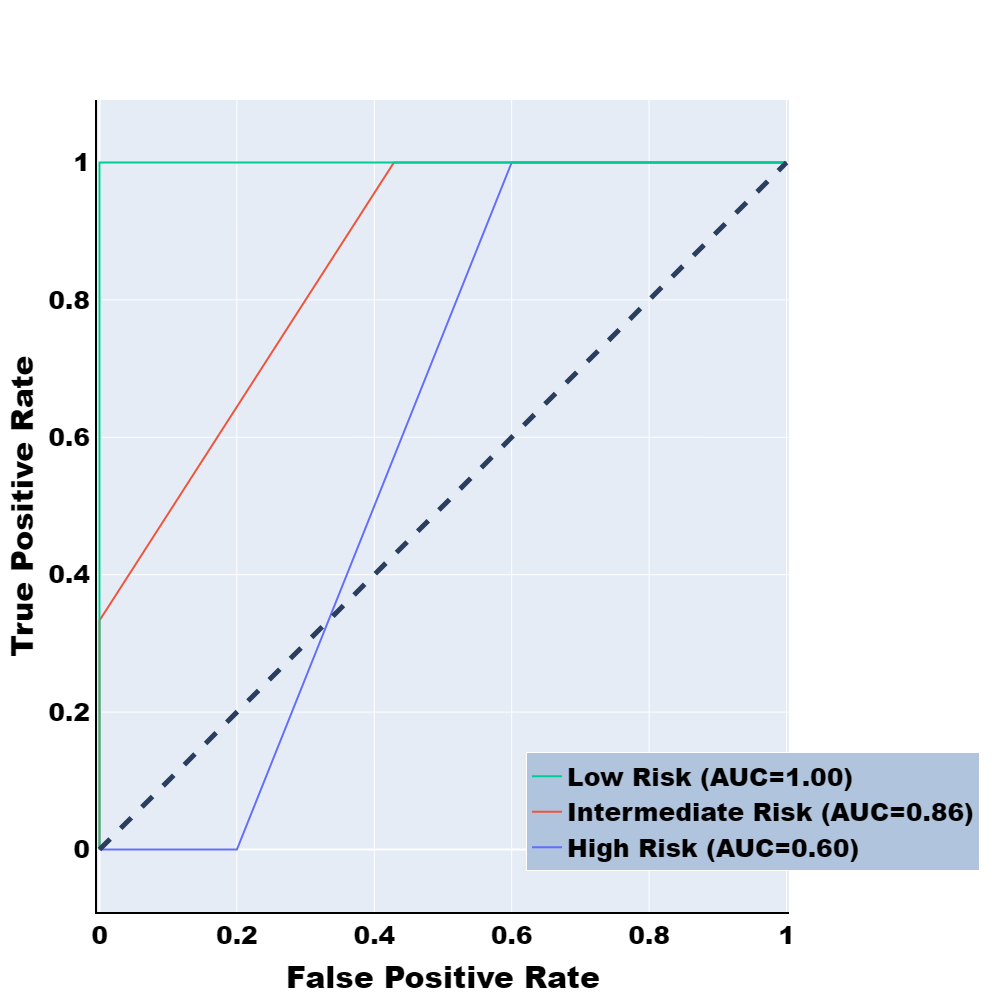

---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------


In [ ]:

#Change the attriutes for graph
graph_attributes={
    "Font Size"  : 25,
    "Font Color" : "black",
    "Legend Font Size"  : 25,
    "Legend Font Color" : "black",
    "Legend bgcolor"    : "LightSteelBlue",
    "Legend bordercolor": "White",
    "Legend borderwidth": 1

}



for i in range(len(new_keys_9)):
  if new_keys_9[i].value ==True:
    print(models[i])
    fig1=ploty_ROC(models[i],X_train,y_train,str(models[i]),graph_attributes)
    fig2=ploty_ROC(models[i],X_test,y_test,str(models[i]),graph_attributes)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")